# 48-hour Exam (Group 5)
# Video Game Ratings: Industry and Consumer Trend Analysis

*Group Members:*
- *Pei I Wu*
- *Abu Bakar Siddique*
- *Eleanor Ruth Thomas*
- *Farmand Bazdiditehrani*
- *Jaykumar Himatbhai Savani*
- *Mohammad Tabish Mohd Iqbal Momin*

### Dataset Description
***Games dataset: 1512 datapoints (rows) and 13 features (columns)***
- **Title**: Name of the game
- **Release date**: The exact date that the game was released
- **Team**: The team who has developed the game
- **Rating**: Average user rating of the game out of 5
- **Times listed**: The number of listings (reviews)
- **Number of Reviews**: Similar to "Times Listed"
- **Genres**: Different genres associated with the games
- **Summary**: Brief description of the game
- **Reviews**: User-generated reviews in text format
- **Plays**: Total number of users who played the game
- **Playing**: Number of users currently playing the game
- **Backlogs**: Number of users who have bought the game but haven't played it (Users who plan to play the game later)
- **Wishlist**: Number of users who have added the game to their wishlist but haven't bought it yet.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import ast
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

### Importing Dataset

In [6]:
df = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\games.csv\\games.csv")
df.head(2)

Unnamed: 0       Title  Release Date  \
0           0  Elden Ring  Feb 25, 2022   
1           1       Hades  Dec 10, 2019   

                                             Team  Rating Times Listed  \
0  ['Bandai Namco Entertainment', 'FromSoftware']     4.5         3.9K   
1                            ['Supergiant Games']     4.3         2.9K   

  Number of Reviews                                    Genres  \
0              3.9K                      ['Adventure', 'RPG']   
1              2.9K  ['Adventure', 'Brawler', 'Indie', 'RPG']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   

                                             Reviews Plays Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...   17K    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...   21K    3.2K     6.3K   

  Wishlist  
0     4.8K  
1     3.6K

#### Dropping unneccessary columns

In [7]:
df = df.drop(columns=['Unnamed: 0'])
df.head(2)

Title  Release Date                                            Team  \
0  Elden Ring  Feb 25, 2022  ['Bandai Namco Entertainment', 'FromSoftware']   
1       Hades  Dec 10, 2019                            ['Supergiant Games']   

   Rating Times Listed Number of Reviews  \
0     4.5         3.9K              3.9K   
1     4.3         2.9K              2.9K   

                                     Genres  \
0                      ['Adventure', 'RPG']   
1  ['Adventure', 'Brawler', 'Indie', 'RPG']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   

                                             Reviews Plays Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...   17K    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...   21K    3.2K     6.3K   

  Wishlist  
0     4.8K  
1     3.6K

In [8]:
df = df.drop(columns=['Number of Reviews'])
df.head(2)

Title  Release Date                                            Team  \
0  Elden Ring  Feb 25, 2022  ['Bandai Namco Entertainment', 'FromSoftware']   
1       Hades  Dec 10, 2019                            ['Supergiant Games']   

   Rating Times Listed                                    Genres  \
0     4.5         3.9K                      ['Adventure', 'RPG']   
1     4.3         2.9K  ['Adventure', 'Brawler', 'Indie', 'RPG']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   
1  A rogue-lite hack and slash dungeon crawler in...   

                                             Reviews Plays Playing Backlogs  \
0  ["The first playthrough of elden ring is one o...   17K    3.8K     4.6K   
1  ['convinced this is a roguelike for people who...   21K    3.2K     6.3K   

  Wishlist  
0     4.8K  
1     3.6K

### Data Inspection

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1512 non-null   object 
 1   Release Date  1512 non-null   object 
 2   Team          1511 non-null   object 
 3   Rating        1499 non-null   float64
 4   Times Listed  1512 non-null   object 
 5   Genres        1512 non-null   object 
 6   Summary       1511 non-null   object 
 7   Reviews       1512 non-null   object 
 8   Plays         1512 non-null   object 
 9   Playing       1512 non-null   object 
 10  Backlogs      1512 non-null   object 
 11  Wishlist      1512 non-null   object 
dtypes: float64(1), object(11)
memory usage: 141.9+ KB


In [10]:
df.isnull().sum()

Title            0
Release Date     0
Team             1
Rating          13
Times Listed     0
Genres           0
Summary          1
Reviews          0
Plays            0
Playing          0
Backlogs         0
Wishlist         0
dtype: int64

In [11]:
df.describe()

Rating
count  1499.000000
mean      3.719346
std       0.532608
min       0.700000
25%       3.400000
50%       3.800000
75%       4.100000
max       4.800000

#### Converting some of the object-value columns to real-value numbers

***For example, in the "Times Listed" column, we have values such as 3.9K which is equal to 3900. In order to be able to compute the average and other descriptive statistics, we converted these columns.***

In [12]:
def convert_k_to_number(value):
    if isinstance(value, str) and 'K' in value:
        return float(value.replace('K', '')) * 1000
    return float(value)  # Convert regular numbers to float
# Apply the function
df['Times Listed'] = df['Times Listed'].apply(convert_k_to_number)
df['Plays'] = df['Plays'].apply(convert_k_to_number)
df['Playing'] = df['Playing'].apply(convert_k_to_number)
df['Backlogs'] = df['Backlogs'].apply(convert_k_to_number)
df['Wishlist'] = df['Wishlist'].apply(convert_k_to_number)

In [13]:
df.head(1)

Title  Release Date                                            Team  \
0  Elden Ring  Feb 25, 2022  ['Bandai Namco Entertainment', 'FromSoftware']   

   Rating  Times Listed                Genres  \
0     4.5        3900.0  ['Adventure', 'RPG']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   

                                             Reviews    Plays  Playing  \
0  ["The first playthrough of elden ring is one o...  17000.0   3800.0   

   Backlogs  Wishlist  
0    4600.0    4800.0

In [14]:
df.describe()

Rating  Times Listed         Plays      Playing     Backlogs  \
count  1499.000000   1512.000000   1512.000000  1512.000000  1512.000000   
mean      3.719346    769.459656   6253.578704   267.379630  1452.577381   
std       0.532608    687.840871   5894.977122   426.453368  1341.971968   
min       0.700000      0.000000      0.000000     0.000000     1.000000   
25%       3.400000    284.000000   1800.000000    43.000000   461.750000   
50%       3.800000    551.000000   4200.000000   112.500000  1000.000000   
75%       4.100000   1000.000000   9100.000000   298.000000  2100.000000   
max       4.800000   4300.000000  33000.000000  3800.000000  8300.000000   

          Wishlist  
count  1512.000000  
mean    780.540344  
std     801.253431  
min       2.000000  
25%     212.000000  
50%     496.000000  
75%    1100.000000  
max    5400.000000

"Reviews" and "Summary" columns are filled with user reviews and short description of the game and need further/deeper analysis like NLP to derive insights from them!

In [15]:
df['Reviews'][0]

'["The first playthrough of elden ring is one of the best eperiences gaming can offer you but after youve explored everything in the open world and you\'ve experienced all of the surprises you lose motivation to go exploring on repeat playthroughs which takes a lot away from the replayability which is a very important thing for from games imo.", \'a replay solidified my love for elden ring. so easily my favorite game of all time. actually beating malenia this time was also an amazing feeling. i just love being in this world man its the greatest of all time\', \'The game is absolutely beautiful, with so much to do. The replayability is crazy. And it never gets old with it too.\', \'Took everything great about the Soulsborne games and make it 100% better.\', \'I play with my overlevelled friend every time and we still fail sometimes (he’s on NG6), insanely difficult game lol\\n                     \\n                     gorgeous graphics, animations, everything about this game is so bea

In [16]:
df['Summary'][0]

'Elden Ring is a fantasy, action and open world game with RPG elements such as stats, weapons and spells. Rise, Tarnished, and be guided by grace to brandish the power of the Elden Ring and become an Elden Lord in the Lands Between.'

### Data Cleaning (Removing rows with missing values)

In [17]:
df['Rating'].isnull().sum()

13

In [18]:
df2 = df.dropna(subset=['Rating'])
df_clean = df2.dropna(subset=['Team'])
df_clean

Title  Release Date  \
0                                  Elden Ring  Feb 25, 2022   
1                                       Hades  Dec 10, 2019   
2     The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3                                   Undertale  Sep 15, 2015   
4                               Hollow Knight  Feb 24, 2017   
...                                       ...           ...   
1507             Back to the Future: The Game  Dec 22, 2010   
1508                        Team Sonic Racing  May 21, 2019   
1509                           Dragon's Dogma  May 22, 2012   
1510                          Baldur's Gate 3  Oct 06, 2020   
1511                 The LEGO Movie Videogame  Feb 04, 2014   

                                                   Team  Rating  Times Listed  \
0        ['Bandai Namco Entertainment', 'FromSoftware']     4.5        3900.0   
1                                  ['Supergiant Games']     4.3        2900.0   
2     ['Nintendo', 'Nintendo EPD Production Group No...     4.4        4300.0   
3                                    ['tobyfox', '8-4']     4.2        3500.0   
4                                       ['Team Cherry']     4.4        3000.0   
...                                                 ...     ...           ...   
1507                                 ['Telltale Games']     3.2          94.0   
1508                           ['Sumo Digital', 'Sega']     2.9         264.0   
1509                                         ['Capcom']     3.7         210.0   
1510                                 ['Larian Studios']     4.1         165.0   
1511                          ['WB Games', 'TT Fusion']     2.8         184.0   

                                                 Genres  \
0                                  ['Adventure', 'RPG']   
1              ['Adventure', 'Brawler', 'Indie', 'RPG']   
2                                  ['Adventure', 'RPG']   
3     ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                    ['Adventure', 'Indie', 'Platform']   
...                                                 ...   
1507                   ['Adventure', 'Point-and-Click']   
1508                               ['Arcade', 'Racing']   
1509                                 ['Brawler', 'RPG']   
1510  ['Adventure', 'RPG', 'Strategy', 'Tactical', '...   
1511                            ['Adventure', 'Puzzle']   

                                                Summary  \
0     Elden Ring is a fantasy, action and open world...   
1     A rogue-lite hack and slash dungeon crawler in...   
2     The Legend of Zelda: Breath of the Wild is the...   
3     A small child falls into the Underground, wher...   
4     A 2D metroidvania with an emphasis on close co...   
...                                                 ...   
1507  Back to the Future: The Game is one of Telltal...   
1508  Team Sonic Racing combines the best elements o...   
1509  Set in a huge open world, Dragon’s Dogma: Dark...   
1510  An ancient evil has returned to Baldur's Gate,...   
1511  Join Emmet and an unlikely group of resistance...   

                                                Reviews    Plays  Playing  \
0     ["The first playthrough of elden ring is one o...  17000.0   3800.0   
1     ['convinced this is a roguelike for people who...  21000.0   3200.0   
2     ['This game is the game (that is not CS:GO) th...  30000.0   2500.0   
3     ['soundtrack is tied for #1 with nier automata...  28000.0    679.0   
4     ["this games worldbuilding is incredible, with...  21000.0   2400.0   
...                                                 ...      ...      ...   
1507  ['Very enjoyable game. The story adds onto the...    763.0      5.0   
1508  ['jogo morto mas bom', 'not my cup of tea', "C...   1500.0     49.0   
1509  ['Underrated.', 'A grandes rasgos, es como un ...   1100.0     45.0   
1510  ['Bu türe bu oyunla girmeye çalışmak hataydı s...    269.0     79.0   
1511  ['Legal', 'Pretty Average Lego Game But

In [19]:
df_clean.isnull().sum()

Title           0
Release Date    0
Team            0
Rating          0
Times Listed    0
Genres          0
Summary         0
Reviews         0
Plays           0
Playing         0
Backlogs        0
Wishlist        0
dtype: int64

In [20]:
df_clean.describe()

Rating  Times Listed         Plays      Playing     Backlogs  \
count  1498.000000   1498.000000   1498.000000  1498.000000  1498.000000   
mean      3.720027    775.156876   6311.834446   269.855808  1463.375167   
std       0.532133    688.335864   5891.431835   427.668688  1342.977036   
min       0.700000      8.000000      1.000000     0.000000     5.000000   
25%       3.400000    294.250000   1900.000000    44.000000   470.250000   
50%       3.800000    555.000000   4300.000000   115.000000  1000.000000   
75%       4.100000   1000.000000   9100.000000   302.000000  2100.000000   
max       4.800000   4300.000000  33000.000000  3800.000000  8300.000000   

          Wishlist  
count  1498.000000  
mean    778.184913  
std     793.828103  
min       2.000000  
25%     212.000000  
50%     496.000000  
75%    1100.000000  
max    4800.000000

#### Dealing with duplicated values (Some rows have the same values for all columns and they are repeated several times

In [21]:
print(df_clean.nunique())

Title           1085
Release Date     976
Team             757
Rating            35
Times Listed     602
Genres           255
Summary         1099
Reviews         1114
Plays            248
Playing          396
Backlogs         536
Wishlist         568
dtype: int64


In [22]:
print(df_clean.duplicated().sum())

382


In [23]:
title_counts = df_clean['Title'].value_counts()
duplicates_only = title_counts[title_counts > 1]
print(duplicates_only)

Title
Doom                         7
Dead Space                   5
Shadow of the Colossus       5
Resident Evil 2              5
God of War                   4
                            ..
Yakuza 3 Remastered          2
Mega Man X                   2
Subnautica                   2
Returnal                     2
New Super Mario Bros. Wii    2
Name: count, Length: 279, dtype: int64


In [24]:
# Find fully duplicated rows
fully_duplicated_rows = df_clean[df_clean.duplicated(keep=False)]  # keep=False keeps all duplicates
print(fully_duplicated_rows)

                                        Title  Release Date  \
0                                  Elden Ring  Feb 25, 2022   
1                                       Hades  Dec 10, 2019   
2     The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3                                   Undertale  Sep 15, 2015   
4                               Hollow Knight  Feb 24, 2017   
...                                       ...           ...   
1269                     Final Fantasy XIII-2  Dec 15, 2011   
1270                                  Agar.io  Apr 28, 2015   
1271        Fatal Frame II: Crimson Butterfly  Nov 27, 2003   
1466                                  FIFA 13  Sep 25, 2012   
1496                                  FIFA 13  Sep 25, 2012   

                                                   Team  Rating  Times Listed  \
0        ['Bandai Namco Entertainment', 'FromSoftware']     4.5        3900.0   
1                                  ['Supergiant Games']     4.3        2900.0   


In [25]:
df_cleaned = df_clean.drop_duplicates()
df_cleaned = df_cleaned.reset_index(drop=True)
print(df_cleaned)

                                        Title  Release Date  \
0                                  Elden Ring  Feb 25, 2022   
1                                       Hades  Dec 10, 2019   
2     The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3                                   Undertale  Sep 15, 2015   
4                               Hollow Knight  Feb 24, 2017   
...                                       ...           ...   
1111             Back to the Future: The Game  Dec 22, 2010   
1112                        Team Sonic Racing  May 21, 2019   
1113                           Dragon's Dogma  May 22, 2012   
1114                          Baldur's Gate 3  Oct 06, 2020   
1115                 The LEGO Movie Videogame  Feb 04, 2014   

                                                   Team  Rating  Times Listed  \
0        ['Bandai Namco Entertainment', 'FromSoftware']     4.5        3900.0   
1                                  ['Supergiant Games']     4.3        2900.0   


In [26]:
df_cleaned

Title  Release Date  \
0                                  Elden Ring  Feb 25, 2022   
1                                       Hades  Dec 10, 2019   
2     The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3                                   Undertale  Sep 15, 2015   
4                               Hollow Knight  Feb 24, 2017   
...                                       ...           ...   
1111             Back to the Future: The Game  Dec 22, 2010   
1112                        Team Sonic Racing  May 21, 2019   
1113                           Dragon's Dogma  May 22, 2012   
1114                          Baldur's Gate 3  Oct 06, 2020   
1115                 The LEGO Movie Videogame  Feb 04, 2014   

                                                   Team  Rating  Times Listed  \
0        ['Bandai Namco Entertainment', 'FromSoftware']     4.5        3900.0   
1                                  ['Supergiant Games']     4.3        2900.0   
2     ['Nintendo', 'Nintendo EPD Production Group No...     4.4        4300.0   
3                                    ['tobyfox', '8-4']     4.2        3500.0   
4                                       ['Team Cherry']     4.4        3000.0   
...                                                 ...     ...           ...   
1111                                 ['Telltale Games']     3.2          94.0   
1112                           ['Sumo Digital', 'Sega']     2.9         264.0   
1113                                         ['Capcom']     3.7         210.0   
1114                                 ['Larian Studios']     4.1         165.0   
1115                          ['WB Games', 'TT Fusion']     2.8         184.0   

                                                 Genres  \
0                                  ['Adventure', 'RPG']   
1              ['Adventure', 'Brawler', 'Indie', 'RPG']   
2                                  ['Adventure', 'RPG']   
3     ['Adventure', 'Indie', 'RPG', 'Turn Based Stra...   
4                    ['Adventure', 'Indie', 'Platform']   
...                                                 ...   
1111                   ['Adventure', 'Point-and-Click']   
1112                               ['Arcade', 'Racing']   
1113                                 ['Brawler', 'RPG']   
1114  ['Adventure', 'RPG', 'Strategy', 'Tactical', '...   
1115                            ['Adventure', 'Puzzle']   

                                                Summary  \
0     Elden Ring is a fantasy, action and open world...   
1     A rogue-lite hack and slash dungeon crawler in...   
2     The Legend of Zelda: Breath of the Wild is the...   
3     A small child falls into the Underground, wher...   
4     A 2D metroidvania with an emphasis on close co...   
...                                                 ...   
1111  Back to the Future: The Game is one of Telltal...   
1112  Team Sonic Racing combines the best elements o...   
1113  Set in a huge open world, Dragon’s Dogma: Dark...   
1114  An ancient evil has returned to Baldur's Gate,...   
1115  Join Emmet and an unlikely group of resistance...   

                                                Reviews    Plays  Playing  \
0     ["The first playthrough of elden ring is one o...  17000.0   3800.0   
1     ['convinced this is a roguelike for people who...  21000.0   3200.0   
2     ['This game is the game (that is not CS:GO) th...  30000.0   2500.0   
3     ['soundtrack is tied for #1 with nier automata...  28000.0    679.0   
4     ["this games worldbuilding is incredible, with...  21000.0   2400.0   
...                                                 ...      ...      ...   
1111  ['Very enjoyable game. The story adds onto the...    763.0      5.0   
1112  ['jogo morto mas bom', 'not my cup of tea', "C...   1500.0     49.0   
1113  ['Underrated.', 'A grandes rasgos, es como un ...   1100.0     45.0   
1114  ['Bu türe bu oyunla girmeye çalışmak hataydı s...    269.0     79.0   
1115  ['Legal', 'Pretty Average Lego Game But

In [27]:
df_cleaned[df_cleaned['Title'] == 'Doom']

Title  Release Date                                   Team  Rating  \
45   Doom  May 12, 2016  ['id Software', 'Bethesda Softworks']     4.0   
132  Doom  Dec 10, 1993          ['Activision', 'id Software']     4.0   
939  Doom  Nov 10, 2017  ['Bethesda Softworks', 'id Software']     3.9   

     Times Listed       Genres  \
45         1800.0  ['Shooter']   
132        1400.0  ['Shooter']   
939          80.0  ['Shooter']   

                                               Summary  \
45   Developed by id software, the studio that pion...   
132  In the future, humans have left Earth and sett...   
939  Doom, the brutally fun and challenging modern-...   

                                               Reviews    Plays  Playing  \
45   ['Recomendado (aunque se hace muy repetitivo)'...  18000.0    541.0   
132  ['Recomendadisimo', 'classic', 'doom my belove...  11000.0    203.0   
939  ['can we get a Doom anime. Now I would watch t...   2300.0     37.0   

     Backlogs  Wishlist  
45     4000.0    1400.0  
132    1500.0     514.0  
939     393.0     150.0

***For example, the game "Doom" was repeated seven times in total which 3 of them were unique. This is why the duplicated ones are removed.***

### Correlation

Pearson Correlation Matrix:

Spearman Correlation Matrix:


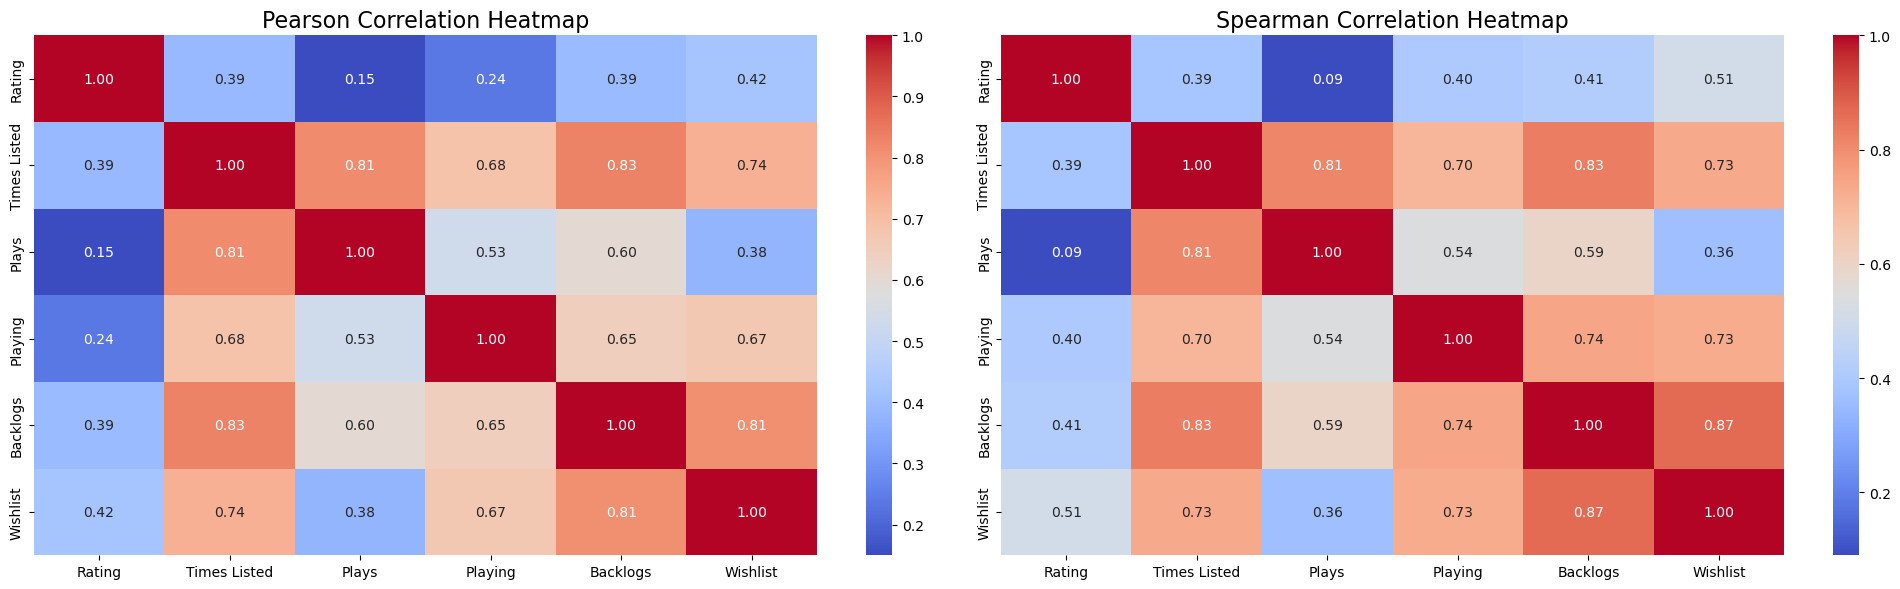

In [28]:
numeric_data = df_cleaned.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

pearson_corr = numeric_data.corr(method='pearson')
spearman_corr = numeric_data.corr(method='spearman')

print("Pearson Correlation Matrix:")
print("\nSpearman Correlation Matrix:")

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap', fontsize=16)
plt.yticks(fontsize=10)

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Heatmap', fontsize=16)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Overall insights:
- More reviews ("Times Listed") generally indicate a higher rating, but it's not a strict rule (moderate correlation).
- Highly rated games are more likely to be wishlisted (strongest correlation with rating).
- Popular games (highly listed) are also frequently played, backlogged, and wishlisted, showing strong connections.
- The number of plays alone does not strongly determine a game's rating (weak correlation).
- People tend to wishlist and backlog games together, possibly for future play (very strong correlation).

### Data Visualization

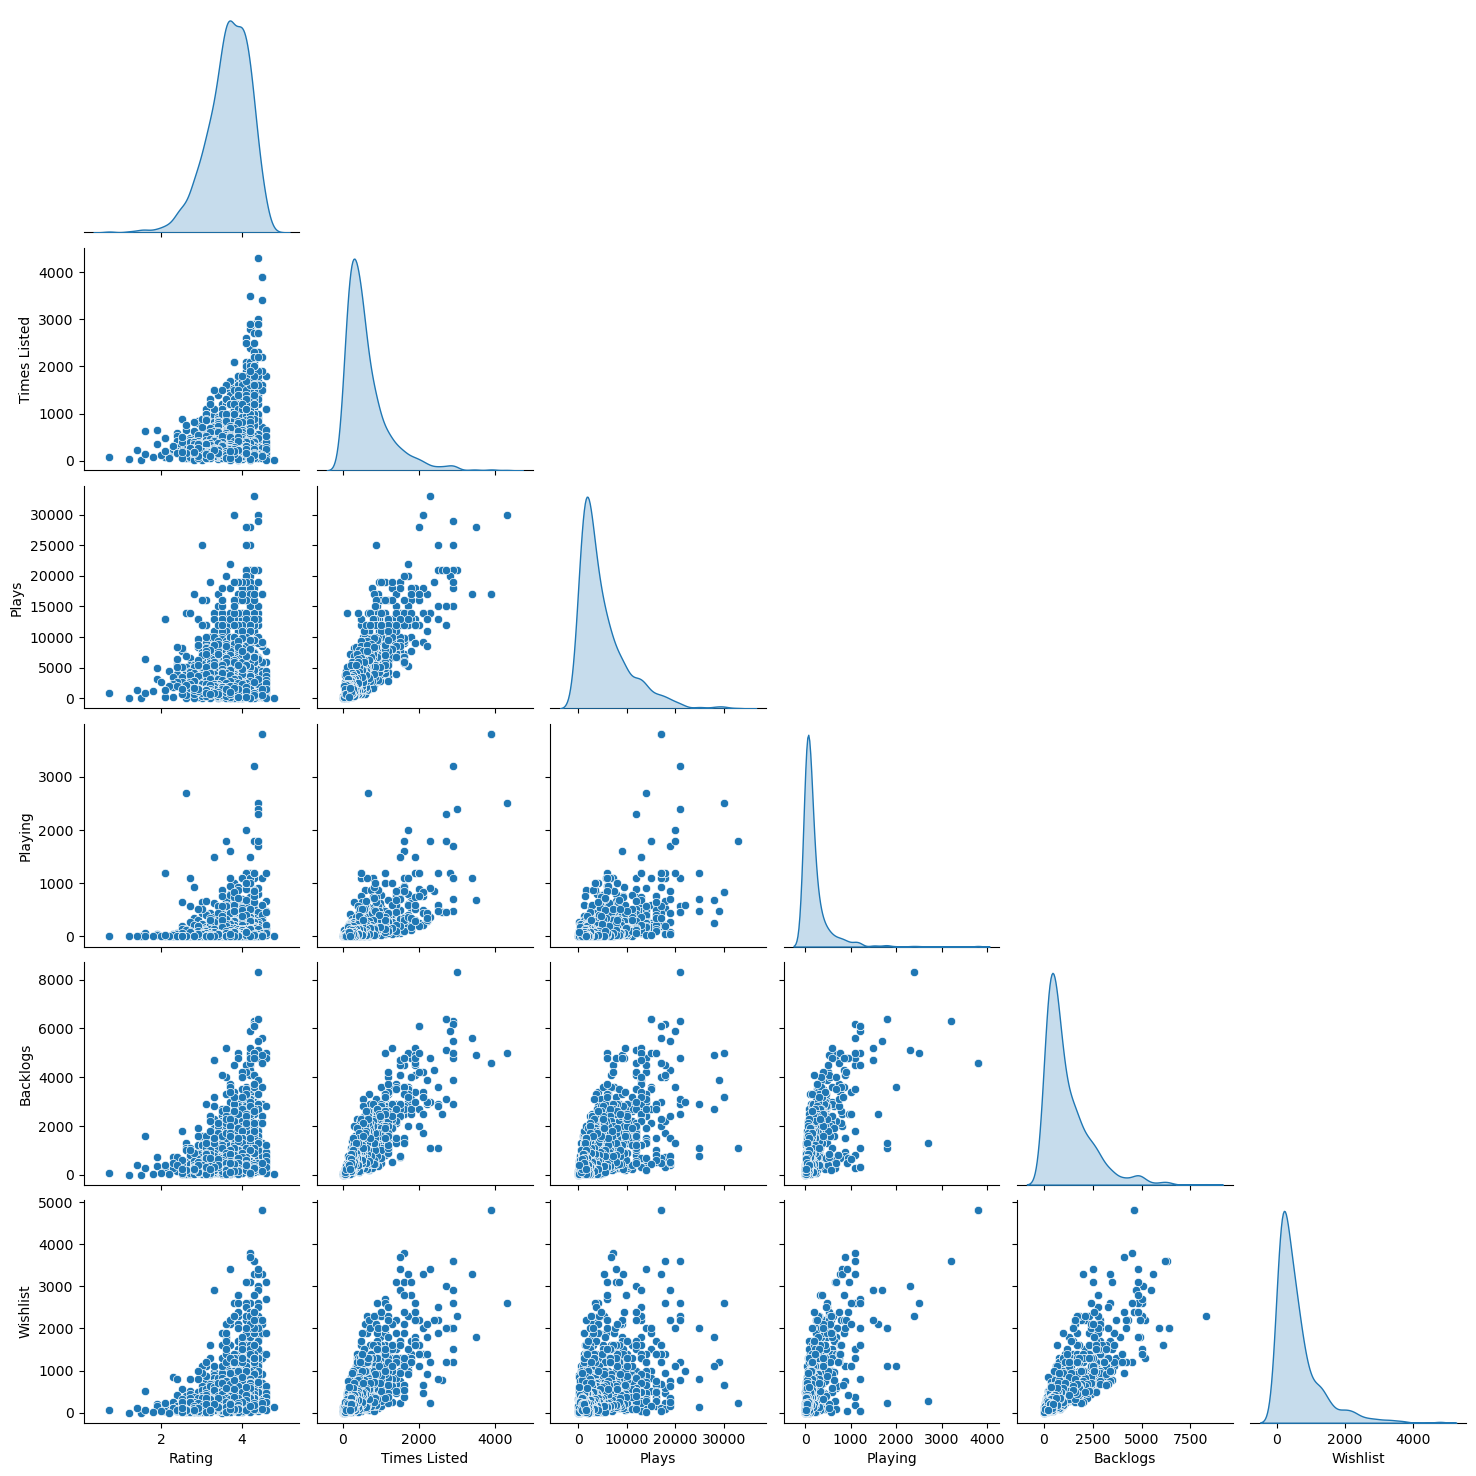

In [29]:
selected_columns = ['Rating', 'Times Listed', 'Plays', 'Playing', 'Backlogs','Wishlist']
sns.pairplot(df_cleaned[selected_columns], diag_kind='kde', corner=True)

### Normality tests

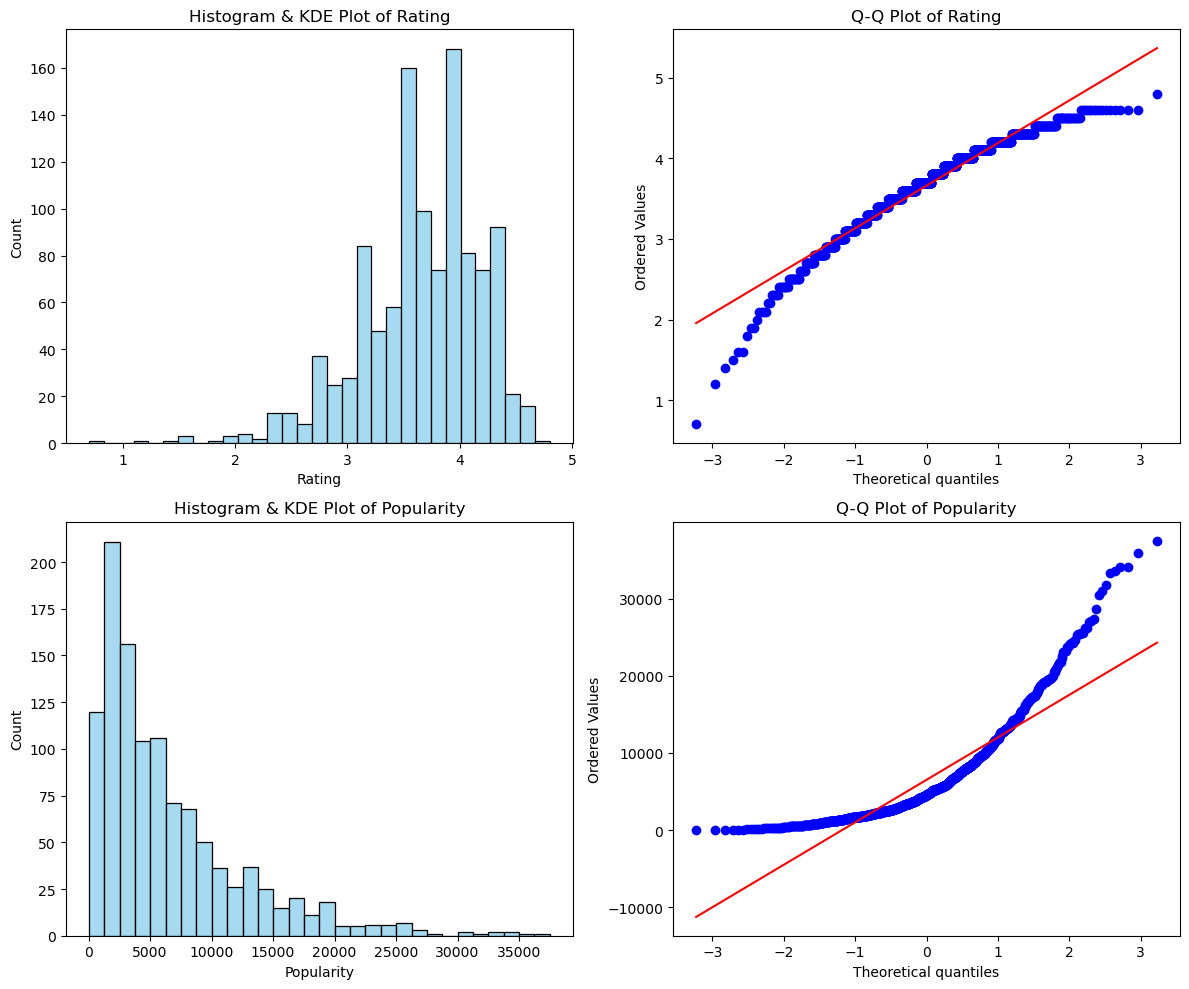

In [61]:
# Create a new column "Popularity" as the sum of Plays, Playing, and Backlogs
df_cleaned["Popularity"] = df_cleaned["Plays"] + df_cleaned["Playing"] + df_cleaned["Backlogs"]
# Select the columns to test
columns_to_test = ["Rating", "Popularity"]
# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Apply Normality Tests
normality_results = {}
for i, column in enumerate(columns_to_test):
    data = df_cleaned[column].dropna()  # Remove NaN values

    # Histogram & KDE Plot
    sns.histplot(data, kde=False, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Histogram & KDE Plot of {column}")

    # Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"Q-Q Plot of {column}")

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(data)

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = stats.kstest(data, 'norm')

    # Anderson-Darling Test
    anderson_result = stats.anderson(data, dist='norm')

    # Skewness & Kurtosis
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    # Store results
    normality_results[column] = {
        "Shapiro-Wilk p-value": shapiro_p,
        "Kolmogorov-Smirnov p-value": ks_p,
        "Anderson-Darling Statistic": anderson_result.statistic,
        "Skewness": skewness,
        "Kurtosis": kurtosis
    }

# Adjust layout and show plots
plt.tight_layout()
plt.show()

- ***Neither Rating nor Popularity follows a normal distribution.***
- ***Since the data is not normally distributed, non-parametric tests (like Spearman correlation, Mann-Whitney U, or Kruskal-Wallis) should be preferred over parametric tests that assume normality.***

### Log transformation

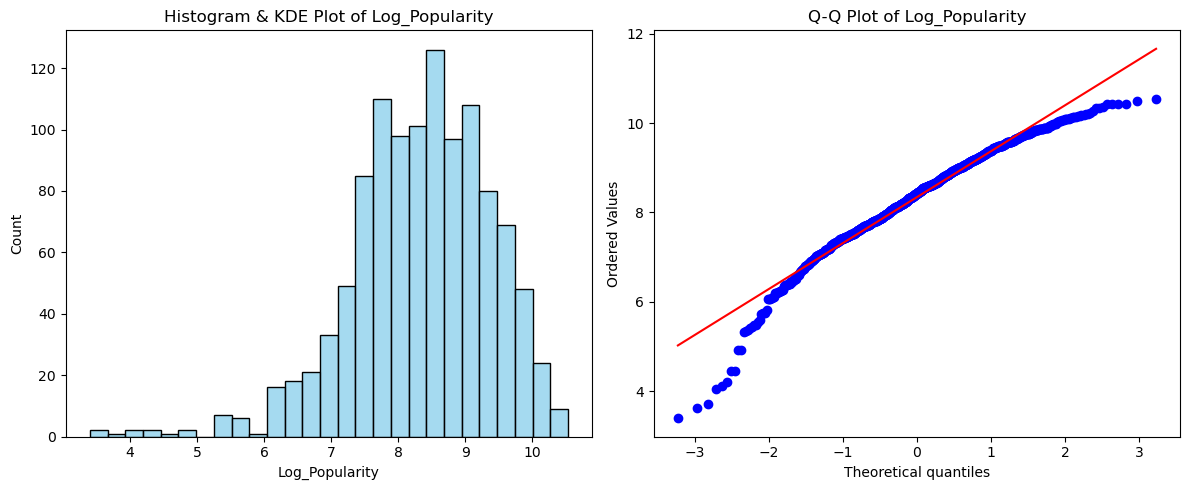

In [62]:
# Apply log transformation (adding 1 to avoid log(0) issue)
df_cleaned["Log_Popularity"] = np.log1p(df_cleaned["Popularity"])

# Re-run normality tests and visualizations on transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram & KDE Plot for Log_Popularity
sns.histplot(df_cleaned["Log_Popularity"].dropna(), kde=False, ax=axes[0], color="skyblue")
axes[0].set_title("Histogram & KDE Plot of Log_Popularity")

# Q-Q Plot for Log_Popularity
stats.probplot(df_cleaned["Log_Popularity"].dropna(), dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Log_Popularity")

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test on Log_Popularity
shapiro_stat, shapiro_p = stats.shapiro(df_cleaned["Log_Popularity"].dropna())

# Perform Kolmogorov-Smirnov test on Log_Popularity
ks_stat, ks_p = stats.kstest(df_cleaned["Log_Popularity"].dropna(), 'norm')

# Perform Anderson-Darling test on Log_Popularity
anderson_result = stats.anderson(df_cleaned["Log_Popularity"].dropna(), dist='norm')

# Compute skewness & kurtosis for Log_Popularity
log_skewness = stats.skew(df_cleaned["Log_Popularity"].dropna())
log_kurtosis = stats.kurtosis(df_cleaned["Log_Popularity"].dropna())

# Store and display results
log_normality_results = pd.DataFrame({
    "Shapiro-Wilk p-value": [shapiro_p],
    "Kolmogorov-Smirnov p-value": [ks_p],
    "Anderson-Darling Statistic": [anderson_result.statistic],
    "Skewness": [log_skewness],
    "Kurtosis": [log_kurtosis]
}, index=["Log_Popularity"])

***Log transformation significantly improves normality, making it much closer to a normal distribution.
The data is still not perfectly normal, but it is better suited for parametric tests like t-tests and ANOVA.***

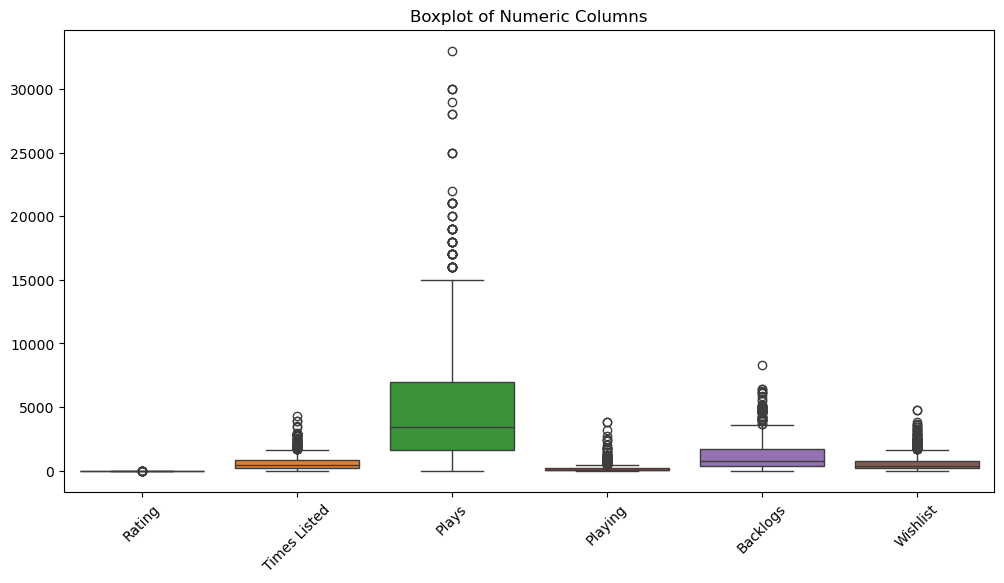

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[['Rating', 'Times Listed', 'Plays', 'Playing', 'Backlogs', 'Wishlist']])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Columns")
plt.show()

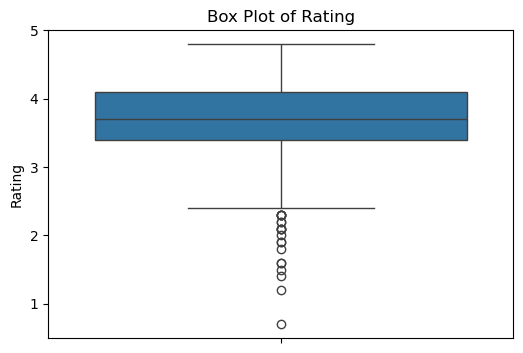

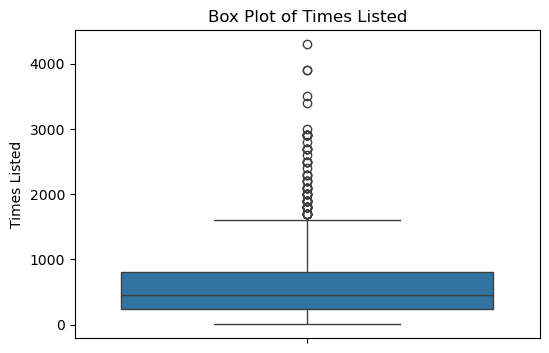

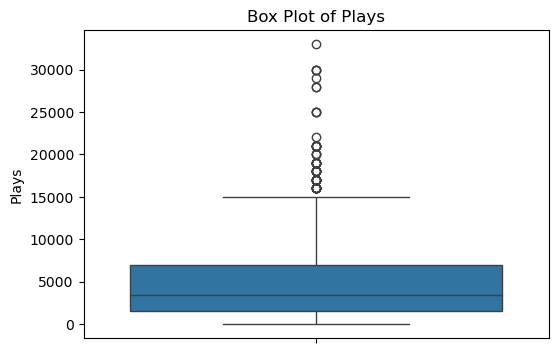

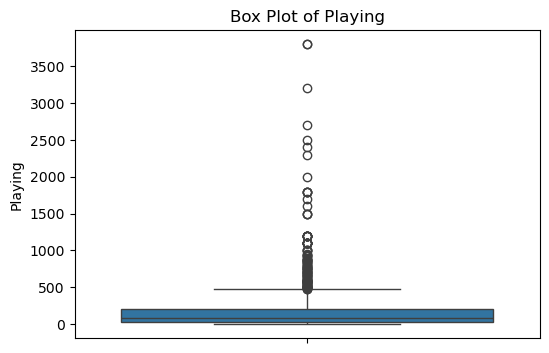

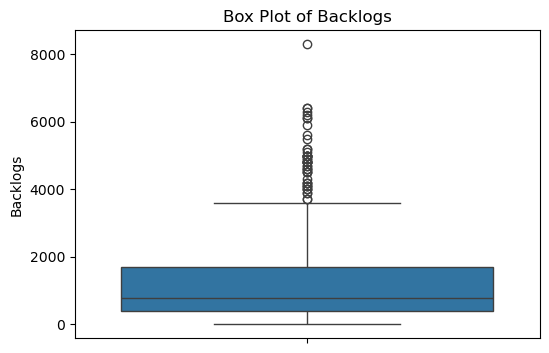

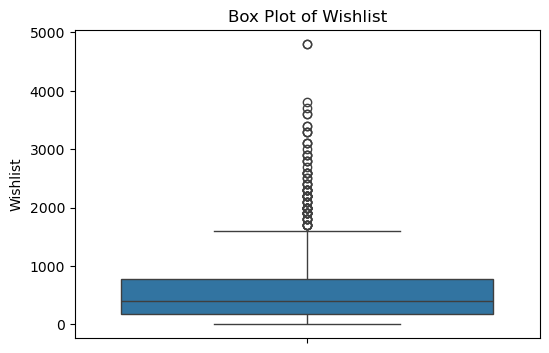

In [31]:
# Loop through each numerical column and create a boxplot
for col in numeric_data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=numeric_data[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

#### Converting the dates to years only (Exact dates and months are of no use for us!)

In [32]:
df_cleaned.head(1)

Title  Release Date                                            Team  \
0  Elden Ring  Feb 25, 2022  ['Bandai Namco Entertainment', 'FromSoftware']   

   Rating  Times Listed                Genres  \
0     4.5        3900.0  ['Adventure', 'RPG']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   

                                             Reviews    Plays  Playing  \
0  ["The first playthrough of elden ring is one o...  17000.0   3800.0   

   Backlogs  Wishlist  
0    4600.0    4800.0

In [33]:
df_cleaned["Release Date"] = pd.to_datetime(df_cleaned["Release Date"], errors='coerce').dt.year
#df_cleaned.to_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\games.csv\\updated_dataset.csv", index=False)
df_cleaned.head(1)

Title  Release Date                                            Team  \
0  Elden Ring        2022.0  ['Bandai Namco Entertainment', 'FromSoftware']   

   Rating  Times Listed                Genres  \
0     4.5        3900.0  ['Adventure', 'RPG']   

                                             Summary  \
0  Elden Ring is a fantasy, action and open world...   

                                             Reviews    Plays  Playing  \
0  ["The first playthrough of elden ring is one o...  17000.0   3800.0   

   Backlogs  Wishlist  
0    4600.0    4800.0

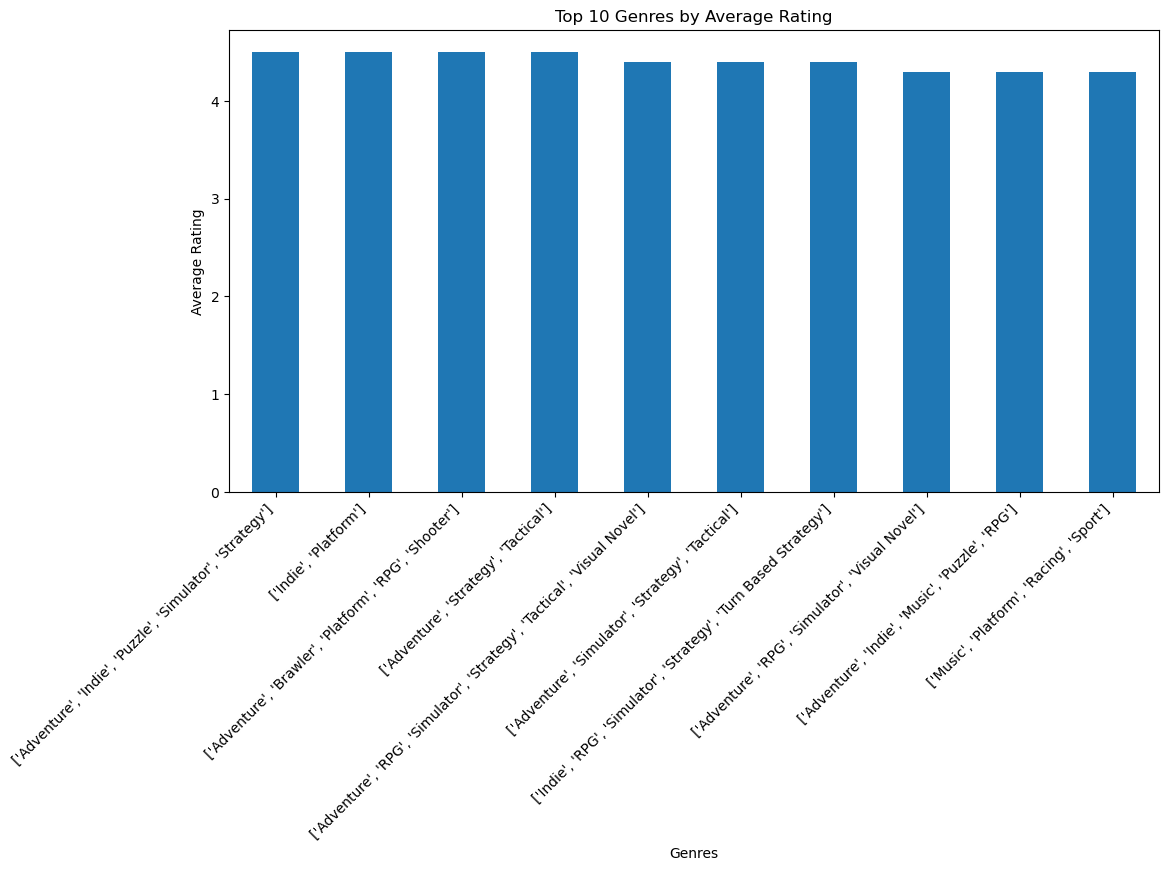

In [34]:
plt.figure(figsize=(12, 6))
genres_rating = df_cleaned.groupby('Genres')['Rating'].mean().sort_values(ascending=False).head(10)
genres_rating.plot(kind='bar')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

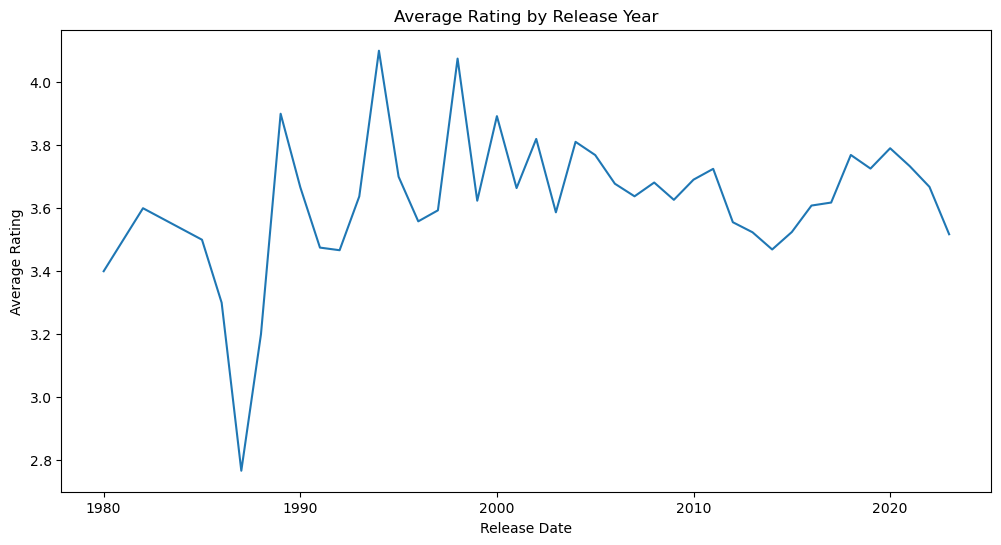

In [35]:
#df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
#df['Release Year'] = df_cleaned['Release Date'].dt.year
plt.figure(figsize=(12, 6))
years_rating = df_cleaned.groupby('Release Date')['Rating'].mean().dropna()
years_rating.plot(kind='line')
plt.title('Average Rating by Release Year')
plt.xlabel('Release Date')
plt.ylabel('Average Rating')
plt.show()

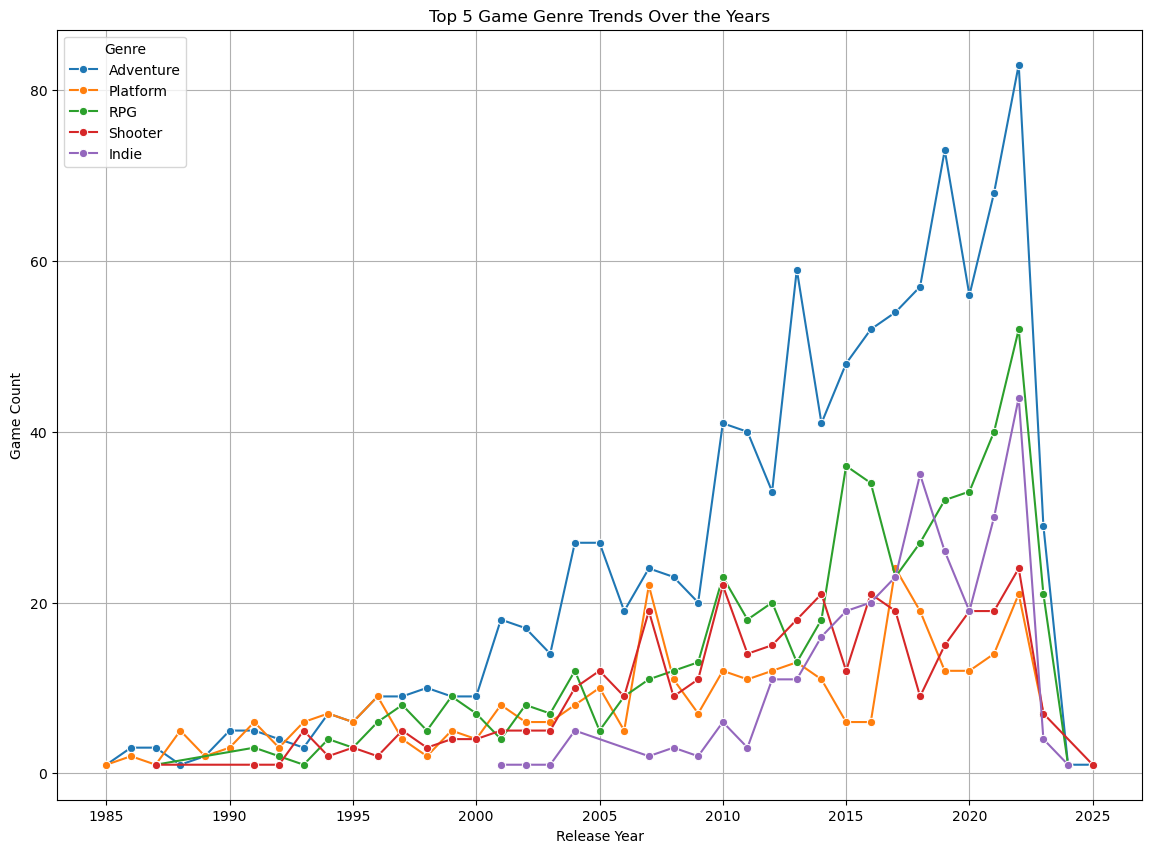

In [36]:
df['Release Year'] = pd.to_datetime(df['Release Date'], errors='coerce').dt.year
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
genre_year_data = []
for index, row in df.iterrows():
    if isinstance(row['Genres'], list):
        for genre in row['Genres']:
            genre_year_data.append({'Release Year': row['Release Year'], 'Genre': genre})
genre_year_df = pd.DataFrame(genre_year_data)
genre_year_counts = genre_year_df.groupby(['Release Year', 'Genre']).size().reset_index(name='Game Count')

top_genres = genre_year_counts.groupby('Genre')['Game Count'].sum().sort_values(ascending=False).head(5).index
filtered_genre_year_counts = genre_year_counts[genre_year_counts['Genre'].isin(top_genres)]

plt.figure(figsize=(14, 10))
sns.lineplot(data=filtered_genre_year_counts, x='Release Year', y='Game Count', hue='Genre', marker='o')
plt.title('Top 5 Game Genre Trends Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Game Count')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

Basic Statistics:
       Release Date       Rating  Times Listed         Plays      Playing  \
count   1114.000000  1116.000000   1116.000000   1116.000000  1116.000000   
mean    2011.569120     3.661918    622.640681   5122.372760   199.161290   
std        8.594445     0.540048    575.198386   5047.321876   348.007395   
min     1980.000000     0.700000      8.000000      1.000000     0.000000   
25%     2006.000000     3.400000    238.000000   1600.000000    34.750000   
50%     2013.000000     3.700000    453.000000   3400.000000    84.000000   
75%     2019.000000     4.100000    801.250000   7000.000000   210.000000   
max     2023.000000     4.800000   4300.000000  33000.000000  3800.000000   

          Backlogs     Wishlist  
count  1116.000000  1116.000000  
mean   1198.736559   615.016129  
std    1164.563847   659.616096  
min       5.000000     2.000000  
25%     389.750000   178.000000  
50%     776.500000   407.000000  
75%    1700.000000   774.250000  
max    8300.0000

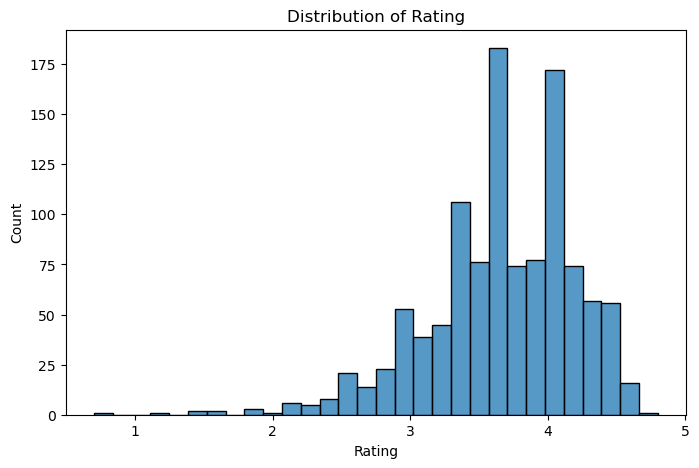

KeyError: 'Popularity Score'

<Figure size 800x500 with 0 Axes>

In [37]:
def plot_distribution(df, column):
    """Plots the distribution of a given numerical column."""
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=30, kde=False)
    plt.title(f'Distribution of {column}')
    plt.show()

def plot_correlation_matrix(df):
    """Plots the correlation matrix of numerical columns."""
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

def plot_top_genres(df):
    """Plots the most common genres."""
    genres_list = [genre for sublist in df['Genres'].dropna() for genre in sublist]
    genre_counts = pd.Series(genres_list).value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=genre_counts.values, y=genre_counts.index)
    plt.title('Top 10 Most Common Genres')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.show()

def plot_rating_distribution(df):
    """Plots the distribution of game ratings."""
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Rating'], bins=10, kde=False, color='blue')
    plt.title('Distribution of Game Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

def plot_genre_popularity(df):
    """Plots the popularity of different genres based on their occurrences."""
    genre_counts = pd.Series([genre for sublist in df['Genres'] for genre in sublist]).value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title('Popularity of Game Genres')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.show()

def plot_correlation_heatmap(df):
    """Plots a heatmap of feature correlations."""
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Heatmap')
    plt.show()

def compute_popularity_score(df):
    """Computes a composite popularity score based on multiple engagement metrics."""
    df['Popularity Score'] = df['Plays'] + df['Wishlist'] + df['Backlogs']
    return df

def feature_engineering(df):
    """Applies all feature engineering functions to the dataframe."""
    df = compute_popularity_score(df)
    return df
# Apply EDA steps
def exploratory_data_analysis(df):
    """Performs EDA on the dataframe."""
    print("Basic Statistics:")
    print(df.describe())
    plot_distribution(df, 'Rating')
    plot_distribution(df, 'Popularity Score')
    plot_correlation_matrix(df)
    plot_top_genres(df)
    # Run visualizations
    plot_rating_distribution(df)
    plot_genre_popularity(df)
    plot_correlation_heatmap(df)

exploratory_data_analysis(df_cleaned)

### Extracting teams from its column

In [38]:
df_cleaned["Team"] = df_cleaned["Team"].astype(str)
df_cleaned["Team"] = df_cleaned["Team"].str.strip("[]").str.replace("'", "").str.split(", ")
df_exploded = df_cleaned.explode("Team")
team_game_counts = df_exploded["Team"].value_counts()
team_game_counts_df = team_game_counts.reset_index()
team_game_counts_df.columns = ["Team", "Number of Games"]
team_game_counts_df.to_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\games.csv\\after_team_split.csv", index=False)

output_file_path = "C:\\Users\\ASUS\\OneDrive\\Desktop\\games.csv\\after_team_split.csv"
team_game_counts_df.to_csv(output_file_path, index=False)

In [39]:
df2 = pd.read_csv(output_file_path)
df2

Team  Number of Games
0              Nintendo              173
1                Capcom               64
2           Square Enix               57
3                  Sega               47
4       Electronic Arts               42
..                  ...              ...
655      The LEGO Group                1
656  Light Brick Studio                1
657  United Front Games                1
658    Warhorse Studios                1
659           TT Fusion                1

[660 rows x 2 columns]

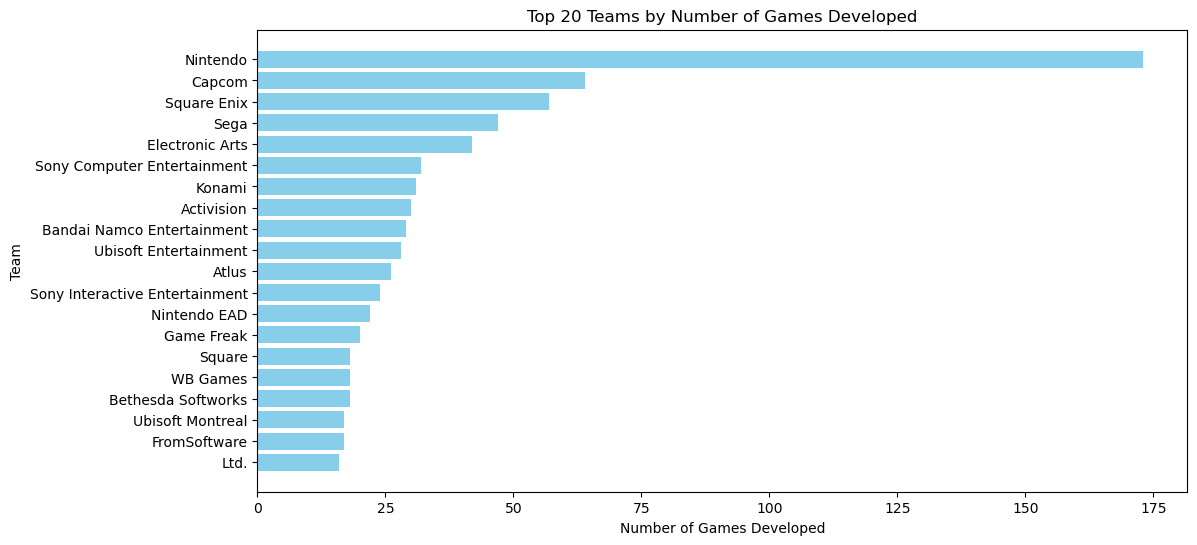

In [40]:
top_teams_df = team_game_counts_df.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_teams_df["Team"], top_teams_df["Number of Games"], color='skyblue')
plt.xlabel("Number of Games Developed")
plt.ylabel("Team")
plt.title("Top 20 Teams by Number of Games Developed")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

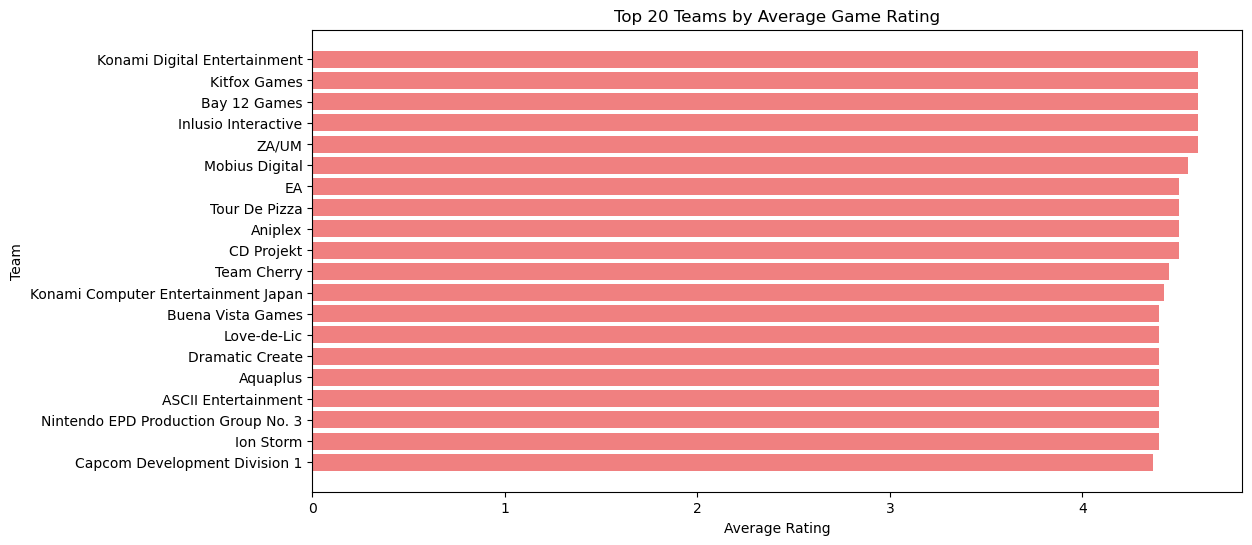

In [41]:
# Group by team and calculate the average rating
average_rating_per_team = df_exploded.groupby("Team")["Rating"].mean().sort_values(ascending=False)

# Convert to DataFrame
average_rating_df = average_rating_per_team.reset_index()
average_rating_df.columns = ["Team", "Average Rating"]

# Select top 20 teams for better visualization
top_avg_rating_df = average_rating_df.head(20)

# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(top_avg_rating_df["Team"], top_avg_rating_df["Average Rating"], color='lightcoral')
plt.xlabel("Average Rating")
plt.ylabel("Team")
plt.title("Top 20 Teams by Average Game Rating")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

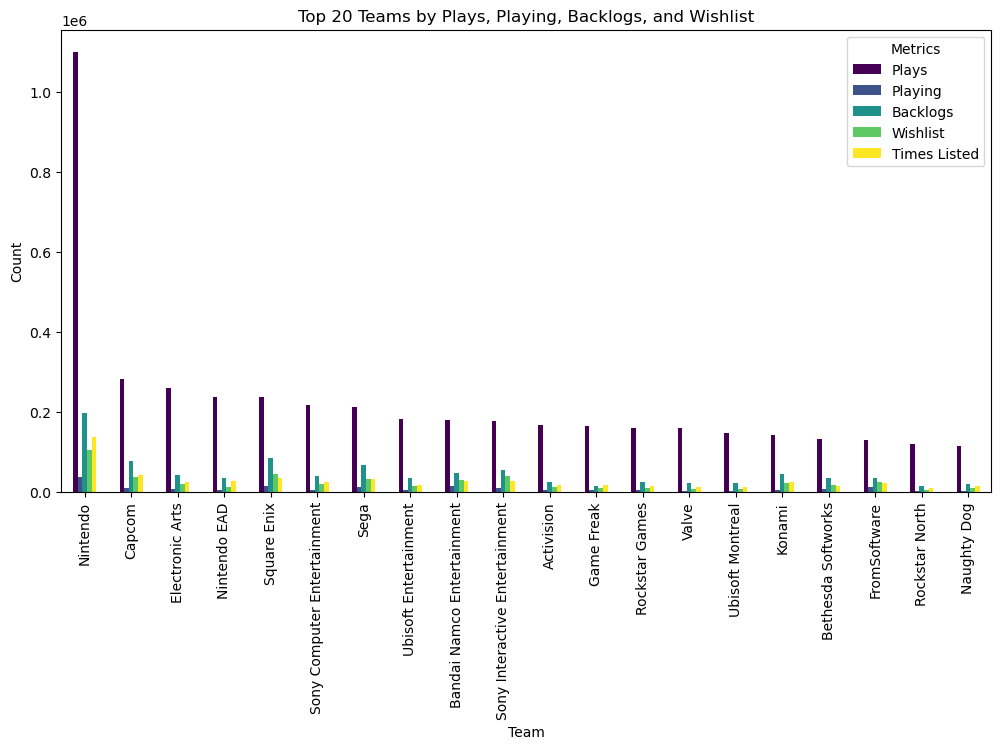

In [42]:
team_metrics = df_exploded.groupby("Team")[["Plays", "Playing", "Backlogs", "Wishlist", "Times Listed"]].sum()
top_teams_metrics = team_metrics.sort_values("Plays", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(12, 6))
top_teams_metrics.plot(kind="bar", ax=ax, colormap="viridis")
plt.xlabel("Team")
plt.ylabel("Count")
plt.title("Top 20 Teams by Plays, Playing, Backlogs, and Wishlist")
plt.xticks(rotation=90)
plt.legend(title="Metrics")
plt.show()

#### Extracting genres

In [43]:
# Ensure the "Genres" column is treated as a string before applying string operations
df_cleaned["Genres"] = df_cleaned["Genres"].astype(str)
# Extract individual genre names from the "Genres" column
df_cleaned["Genres"] = df_cleaned["Genres"].str.strip("[]").str.replace("'", "").str.split(", ")
# Explode the "Genres" column to have one genre per row
df_exploded_genres = df_cleaned.explode("Genres")
# Count the number of games per genre
genre_game_counts = df_exploded_genres["Genres"].value_counts()
# Convert to DataFrame
genre_game_counts_df = genre_game_counts.reset_index()
genre_game_counts_df.columns = ["Genre", "Number of Games"]
#genre_game_counts_df.to_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\games.csv\\after_genre_split.csv", index=False)
output_file_path2 = "C:\\Users\\ASUS\\OneDrive\\Desktop\\games.csv\\after_genre_split.csv"
genre_game_counts_df.to_csv(output_file_path, index=False)
df3 = pd.read_csv(output_file_path2)
df3

Genre  Number of Games
0             Adventure              727
1                   RPG              368
2               Shooter              263
3              Platform              243
4                 Indie              206
5                Puzzle              132
6              Strategy              117
7               Brawler              107
8             Simulator               95
9   Turn Based Strategy               71
10             Fighting               64
11               Arcade               60
12         Visual Novel               53
13             Tactical               42
14               Racing               37
15      Point-and-Click               36
16                Music               22
17                Sport               20
18    Card & Board Game               13
19   Real Time Strategy                9
20                 MOBA                3
21          Quiz/Trivia                3
22                  NaN                2
23              Pinball                1

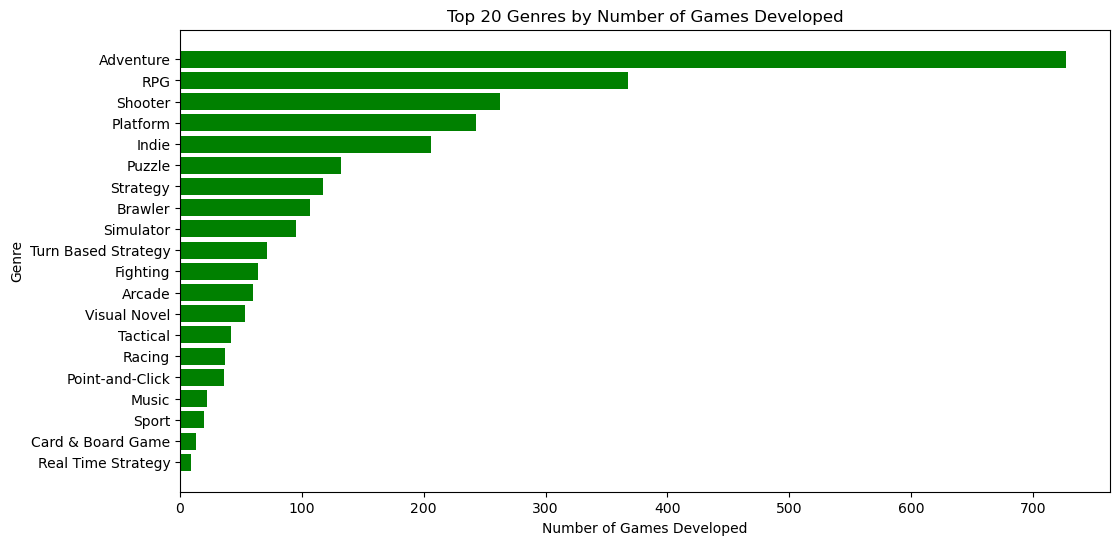

In [44]:
top_teams_df = genre_game_counts_df.head(20)
plt.figure(figsize=(12, 6))
plt.barh(top_teams_df["Genre"], top_teams_df["Number of Games"], color='green')
plt.xlabel("Number of Games Developed")
plt.ylabel("Genre")
plt.title("Top 20 Genres by Number of Games Developed")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

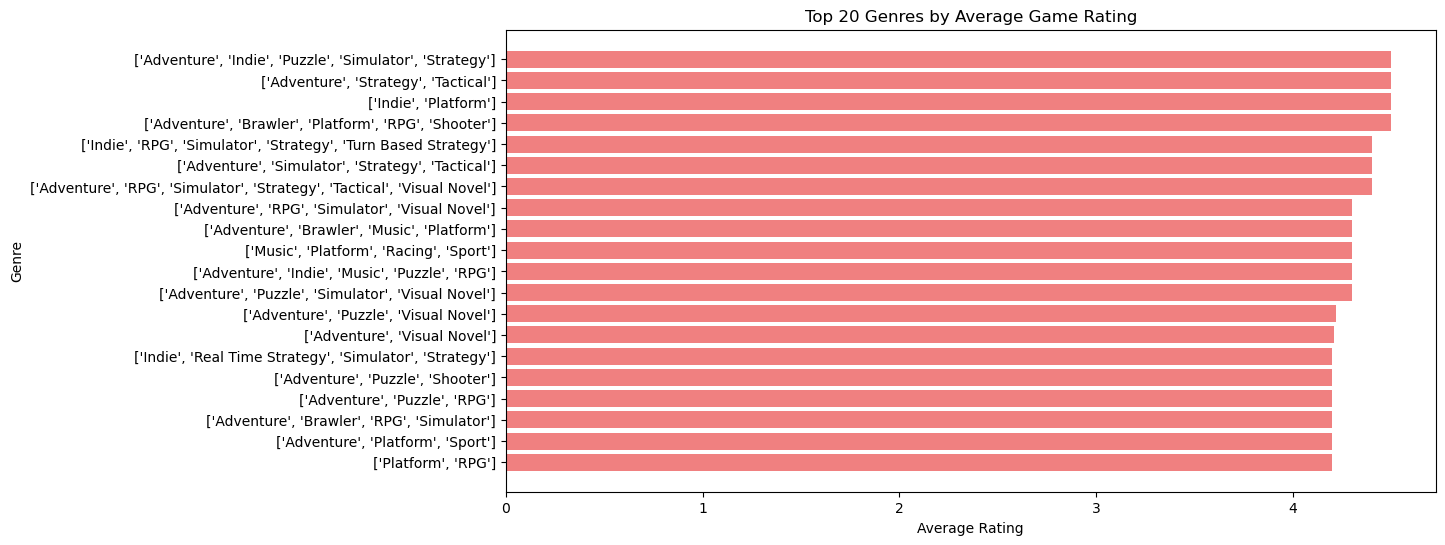

In [45]:
df_exploded = df_exploded.explode("Genres")  # Ensure Genres is not a list
average_rating_per_genre = df_exploded.groupby("Genres")["Rating"].mean().sort_values(ascending=False)
average_rating_df2 = average_rating_per_genre.reset_index()
average_rating_df2.columns = ["Genres", "Average Rating"]

# Select top 20 teams for better visualization
top_avg_rating_df2 = average_rating_df2.head(20)

# Plot the data
plt.figure(figsize=(12, 6))
plt.barh(top_avg_rating_df2["Genres"], top_avg_rating_df2["Average Rating"], color='lightcoral')
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Top 20 Genres by Average Game Rating")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

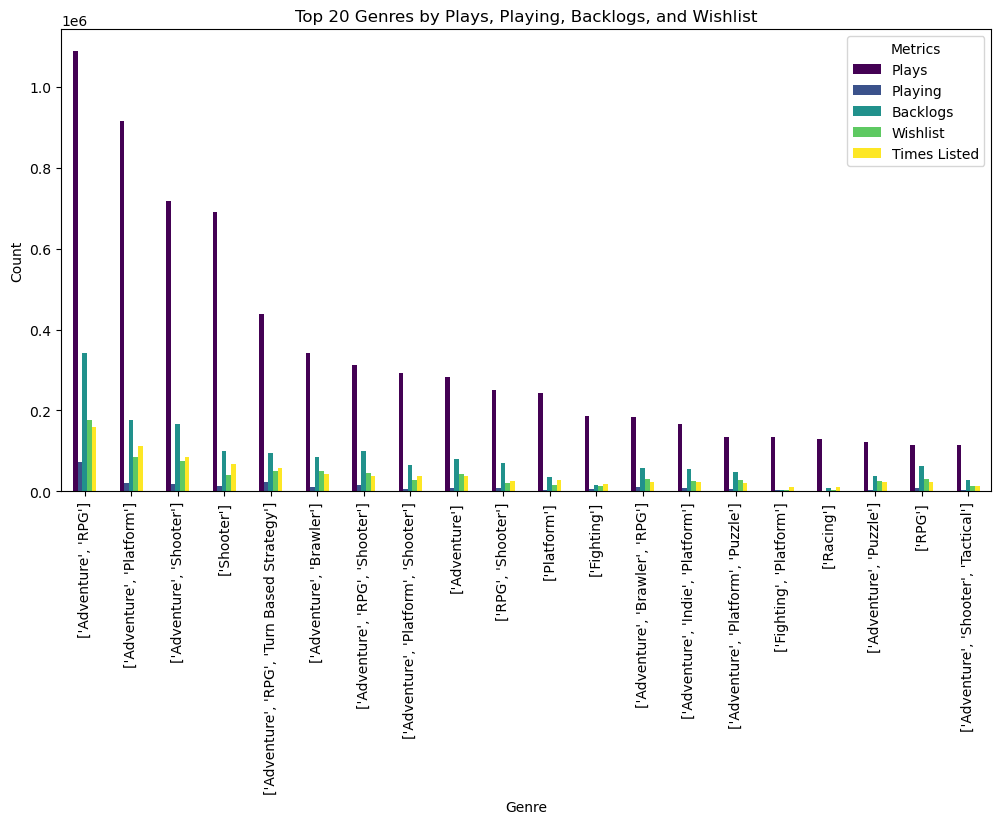

In [46]:
genre_metrics = df_exploded.groupby("Genres")[["Plays", "Playing", "Backlogs", "Wishlist", "Times Listed"]].sum()
top_genres_metrics = genre_metrics.sort_values("Plays", ascending=False).head(20)
fig, ax = plt.subplots(figsize=(12, 6))
top_genres_metrics.plot(kind="bar", ax=ax, colormap="viridis")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 20 Genres by Plays, Playing, Backlogs, and Wishlist")
plt.xticks(rotation=90)
plt.legend(title="Metrics")
plt.show()

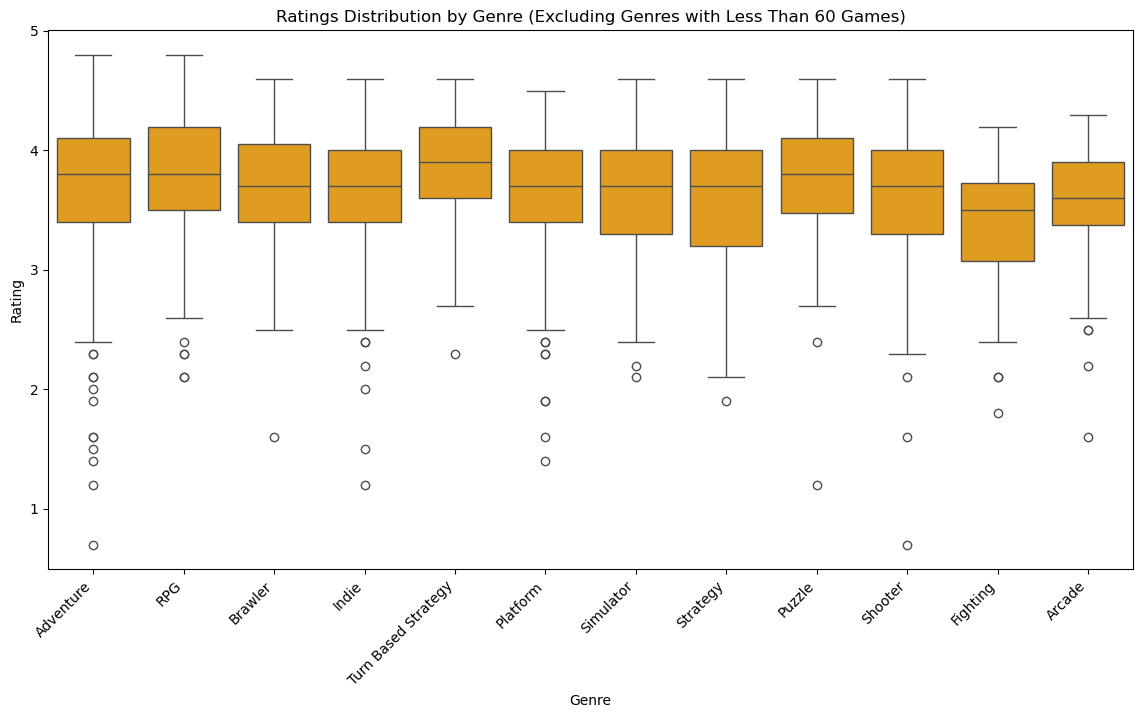

In [54]:
df_genre_ratings = df_exploded_genres[["Genres", "Rating"]].dropna()
# Filter genres with at least 60 games for better visualization
filtered_genres = df_genre_ratings["Genres"].value_counts()
valid_genres = filtered_genres[filtered_genres >= 60].index
df_filtered = df_genre_ratings[df_genre_ratings["Genres"].isin(valid_genres)]
# Plot the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_filtered, x="Genres", y="Rating", color='orange')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.title("Ratings Distribution by Genre (Excluding Genres with Less Than 60 Games)")
plt.show()

                                          Title  Rating    Plays
879           Elden Ring: Shadow of the Erdtree     4.8      1.0
43                                  Outer Wilds     4.6   7700.0
28                 Disco Elysium: The Final Cut     4.6   6000.0
297                 Bloodborne: The Old Hunters     4.6   4400.0
139                               Disco Elysium     4.6   4000.0
640             Metal Gear Solid 3: Subsistence     4.6   3700.0
704           Final Fantasy XIV: Shadowbringers     4.6   3000.0
612                Final Fantasy XIV: Endwalker     4.6   2500.0
827  Metal Gear Solid 3: Snake Eater HD Edition     4.6   2500.0
768                             Half-Life: Alyx     4.6   1900.0
252                Umineko: When They Cry Chiru     4.6   1700.0
929        Bloodborne: Game of the Year Edition     4.6   1500.0
735    Sekiro: Shadows Die Twice - GOTY Edition     4.6   1400.0
721           The Great Ace Attorney 2: Resolve     4.6   1100.0
783                      

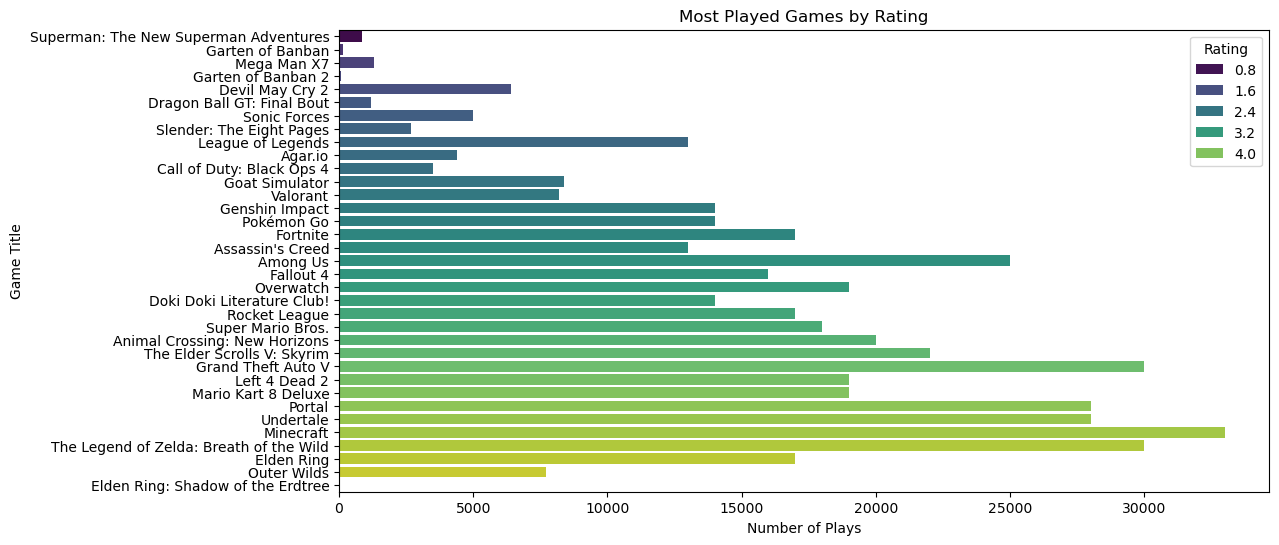

In [55]:
# Sort the DataFrame by Rating and then Plays
sorted_by_rating_plays = df_cleaned.sort_values(by=['Rating', 'Plays'], ascending=[False, False])

# Display the top games sorted by rating and plays
top_games_by_rating_plays = sorted_by_rating_plays[['Title', 'Rating', 'Plays']]
print(top_games_by_rating_plays.head(20))

# Group by Rating and get the game with the most plays in each rating group
most_played_by_rating = df_cleaned.loc[df_cleaned.groupby('Rating')['Plays'].idxmax()]

# Display relevant columns (Title, Rating, Plays)
top_games_by_rating = most_played_by_rating[['Title', 'Rating', 'Plays']]
print(top_games_by_rating)

plt.figure(figsize=(12, 6))
sns.barplot(x='Plays', y='Title', hue='Rating', data=most_played_by_rating, palette='viridis')
plt.title('Most Played Games by Rating')
plt.xlabel('Number of Plays')
plt.ylabel('Game Title')
plt.show()

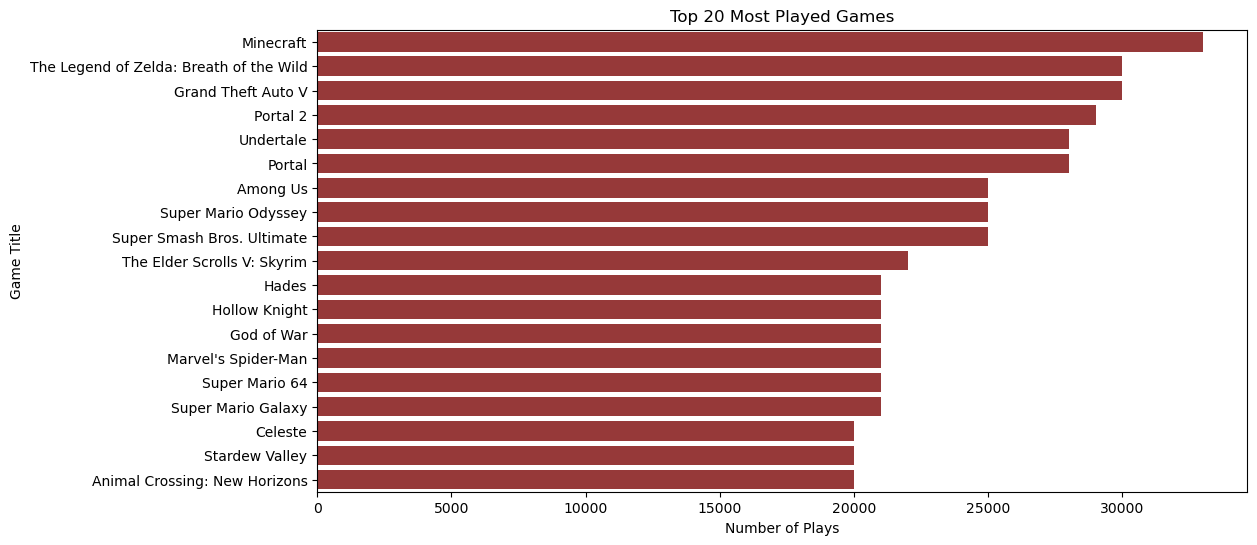

In [56]:
# Step 1: Get the top 20 most played games
top_20_most_played = df_cleaned.nlargest(20, 'Plays')

# Step 2: Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Plays', y='Title', data=top_20_most_played, color='brown')
plt.title('Top 20 Most Played Games')
plt.xlabel('Number of Plays')
plt.ylabel('Game Title')
plt.show()

count    1114.000000
mean     2011.569120
std         8.594445
min      1980.000000
25%      2006.000000
50%      2013.000000
75%      2019.000000
max      2023.000000
Name: Release Year, dtype: float64


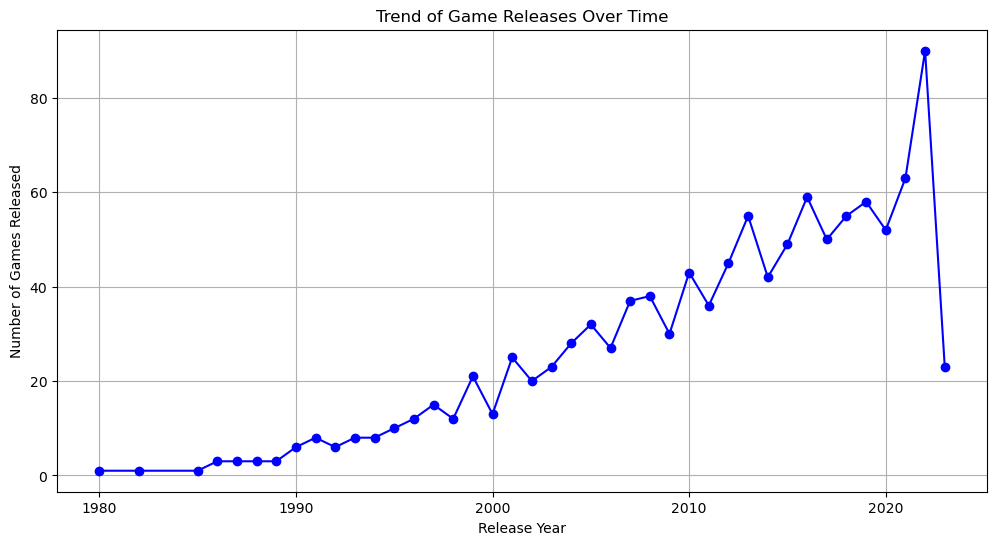

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\games.csv\\modified_dataset.csv")
df['Release Year'] = pd.to_datetime(df['Release Date'], errors='coerce').dt.year
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df = df.dropna(subset=['Release Year'])
df['Release Year'] = df['Release Year'].astype(int)
df = df[(df['Release Year'] >= 1980) & (df['Release Year'] <= 2025)]
print(df['Release Year'].describe())  # 查看年份的基本統計數據
release_trend = df['Release Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(release_trend.index, release_trend.values, marker='o', linestyle='-', color='b')
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
plt.title("Trend of Game Releases Over Time")
plt.grid(True)
plt.show()

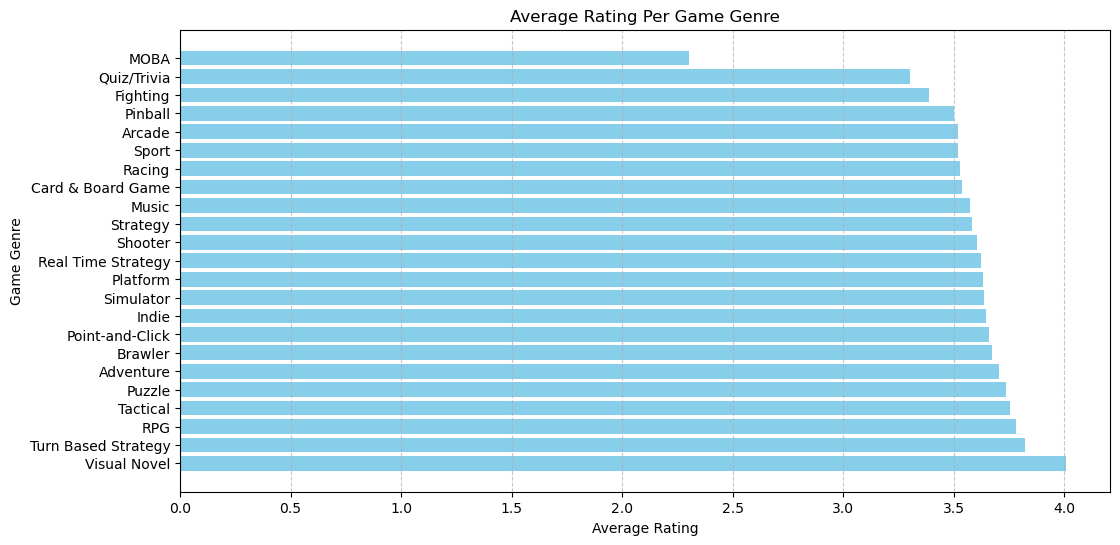

In [3]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('Genres')
genre_avg_score = df_exploded.groupby('Genres')['Rating'].mean().reset_index()
genre_avg_score = genre_avg_score.sort_values(by='Rating', ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(genre_avg_score['Genres'], genre_avg_score['Rating'], color='skyblue')
plt.xlabel("Average Rating")
plt.ylabel("Game Genre")
plt.title("Average Rating Per Game Genre")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

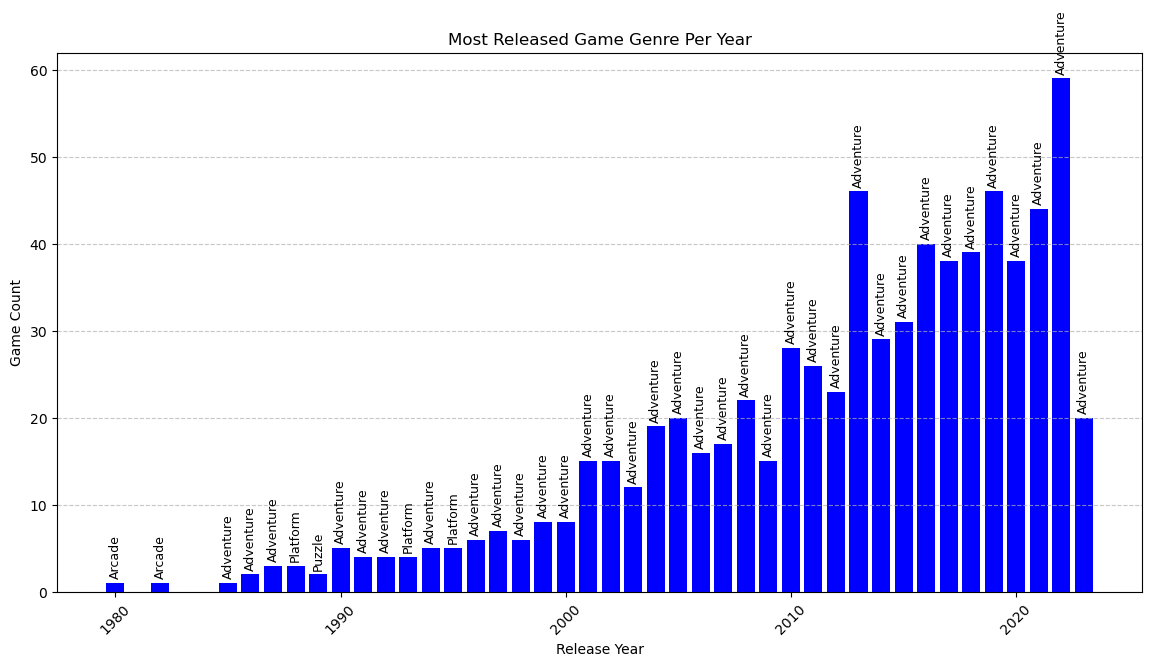

In [4]:
df['Release Year'] = pd.to_datetime(df['Release Date'], errors='coerce').dt.year
df = df.dropna(subset=['Release Year'])
df['Release Year'] = df['Release Year'].astype(int)
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded = df.explode('Genres')
genre_year_counts = df_exploded.groupby(['Release Year', 'Genres']).size().reset_index(name='Game Count')
max_genre_per_year = genre_year_counts.loc[genre_year_counts.groupby('Release Year')['Game Count'].idxmax()]
plt.figure(figsize=(14, 7))
plt.bar(max_genre_per_year['Release Year'], max_genre_per_year['Game Count'], color='b')
for i in range(len(max_genre_per_year)):
    year = max_genre_per_year['Release Year'].iloc[i]
    count = max_genre_per_year['Game Count'].iloc[i]
    genre = max_genre_per_year['Genres'].iloc[i]
    plt.text(year, count + 0.5, genre, fontsize=9, verticalalignment='bottom', horizontalalignment='center', rotation=90)

plt.xlabel("Release Year")
plt.ylabel("Game Count")
plt.title("Most Released Game Genre Per Year")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Statistical tests

#### ANOVA

In [57]:
anova_data = [df_exploded_genres[df_exploded_genres["Genres"] == genre]["Rating"].dropna() 
              for genre in df_exploded_genres["Genres"].unique() if len(df_exploded_genres[df_exploded_genres["Genres"] == genre]) > 10]

anova_result = stats.f_oneway(*anova_data)
anova_result

F_onewayResult(statistic=4.932486956125731, pvalue=3.8904441144025535e-11)

***Since the p-value is extremely small (< 0.05), this indicates that there is a statistically significant difference in average ratings across different game genres. This means that at least one genre has a significantly different average rating compared to the others.***

#### Post-hoc analysis (Tukey)

In [58]:
tukey_data = df_exploded_genres.dropna(subset=["Rating"])
tukey_result = pairwise_tukeyhsd(endog=tukey_data["Rating"], groups=tukey_data["Genres"], alpha=0.05)
print(tukey_result)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
                              Adventure   0.0558    1.0 -1.3035   1.415  False
                                 Arcade  -0.1317    1.0 -1.5115  1.2482  False
                                Brawler   0.0201    1.0 -1.3499  1.3901  False
                      Card & Board Game  -0.1115    1.0 -1.5696  1.3465  False
                               Fighting  -0.2625    1.0 -1.6409  1.1159  False
                                  Indie  -0.0039    1.0 -1.3678  1.3601  False
                                   MOBA    -1.35 0.4335 -3.1024  0.4024  False
                                  Music  -0.0455    1.0 -1.4632  1.3723  False
                                Pinball    -0.15    1.0 -2.5011  2.2011  False
                               Platform  -0.0171    

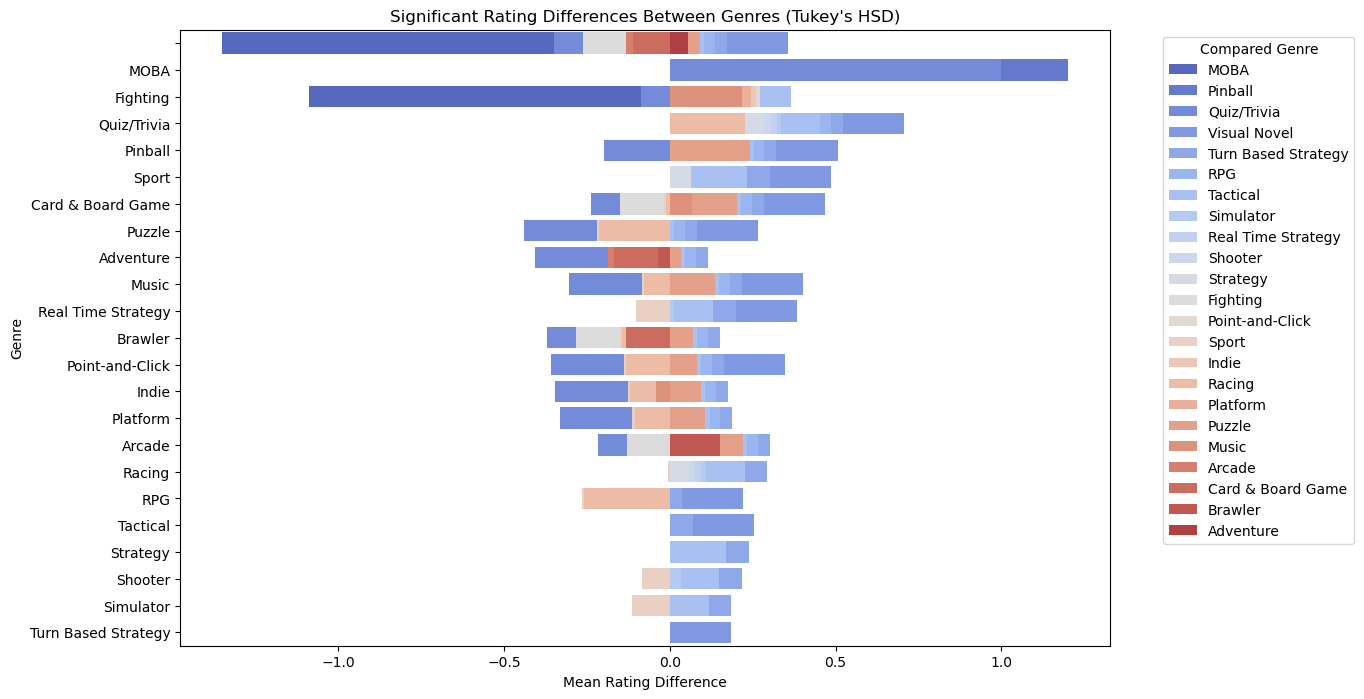

In [59]:
# Extract only significant comparisons from Tukey's HSD results
significant_pairs = [
    (row[0], row[1], float(row[2]))  # Genre 1, Genre 2, Mean Difference
    for row in tukey_result._results_table.data[1:]  # Skip the header
    if row[6] < 0.05  # Filter only significant results based on p-value
]

# Convert to DataFrame for visualization
significant_df = pd.DataFrame(significant_pairs, columns=["Genre 1", "Genre 2", "Mean Difference"])

# Sort by absolute mean difference
significant_df = significant_df.sort_values(by="Mean Difference", key=abs, ascending=False)

# Plot the significant differences
plt.figure(figsize=(12, 8))
sns.barplot(data=significant_df, x="Mean Difference", y="Genre 1", hue="Genre 2", dodge=False, palette="coolwarm")
plt.xlabel("Mean Rating Difference")
plt.ylabel("Genre")
plt.title("Significant Rating Differences Between Genres (Tukey's HSD)")
plt.legend(title="Compared Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Chi-sqaure Test

In [60]:
df_unique = df_exploded.drop_duplicates(subset=["Team", "Genres"])
contingency_table = pd.crosstab(df_unique["Team"], df_unique["Genres"])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
chi2_stat, p_value, dof

(176759.1934103586, 2.7796220504380433e-57, 167386)

***Since the p-value is extremely small (< 0.05), we reject the null hypothesis. This means that there is a statistically significant relationship between game teams and the genres they develop. In other words, certain teams are more likely to develop specific genres.***

### GLM

In [63]:
df_glm = df_cleaned.rename(columns={
    "Times Listed": "Times_Listed",
    "Plays": "Plays",
    "Playing": "Playing",
    "Backlogs": "Backlogs",
    "Wishlist": "Wishlist",
    "Popularity": "Popularity"
})
df_glm = df_glm.dropna(subset=["Rating", "Times_Listed", "Plays", "Playing", "Backlogs", "Wishlist", "Popularity"])
# Fit a Generalized Linear Model (GLM) using a Gaussian family (Normal distribution)
glm_model = smf.glm("Rating ~ Times_Listed + Plays + Playing + Backlogs + Wishlist + Popularity",
                    data=df_glm, family=sm.families.Gaussian()).fit()
# Display model summary
glm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Rating   No. Observations:                 1116
Model:                            GLM   Df Residuals:                     1110
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                         0.22111
Method:                          IRLS   Log-Likelihood:                -738.45
Date:                Thu, 27 Feb 2025   Deviance:                       245.43
Time:                        13:08:04   Pearson chi2:                     245.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2762
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4396      0.023    152.850      0.000       3.395       3.484
Times_Listed     0.0006   7.35e-05      8.490      0.000       0.000       0.001
Plays         5.008e-06   1.76e-05      0.284      0.777   -2.96e-05    3.96e-05
Playing         -0.0001   4.56e-05     -3.047      0.002      -0.000   -4.96e-05
Backlogs      8.471e-05   2.44e-05      3.465      0.001    3.68e-05       0.000
Wishlist      9.124e-05   4.61e-05      1.979      0.048    8.95e-07       0.000
Popularity   -4.936e-05   1.61e-05     -3.072      0.002   -8.08e-05   -1.79e-05
================================================================================
"""

**1. Times Listed (Number of Reviews) Positively Affects Ratings**
- *The more frequently a game is listed, the higher its rating.*
- *A 1000 increase in Times Listed corresponds to a 0.6 increase in Rating.*

**2. Playing Negatively Affects Ratings**
- *The more users are currently playing a game, the lower its rating.*
- *Possibly due to overhyped games receiving lower reviews after release.*

**3. Backlogs & Wishlist Positively Affect Ratings**
- *Higher backlogs → Higher ratings (suggesting well-rated games are saved for later).*
- *More wishlisted games tend to have higher ratings (indicating player interest).*

**4. Popularity Negatively Affects Ratings**
- *More players (Plays + Playing + Backlogs) does not mean a better rating.*
- *Suggests that popular games attract a diverse audience, leading to mixed ratings.*

**Most important predictors of Rating:**

*✅ Times Listed, Backlogs, and Wishlist positively impact ratings.*

*❌ Playing and Popularity negatively impact ratings.*

***Plays do not significantly affect ratings → The number of times a game is played doesn’t directly translate into better ratings.***

## Most parsimonious model

In [64]:
def backward_elimination(data, target):
    """ Perform backward elimination to find the most parsimonious model based on AIC. """
    predictors = list(data.columns)
    predictors.remove(target)
    best_aic = float("inf")
    best_model = None
    best_predictors = predictors

    while len(predictors) > 0:
        formula = f"{target} ~ {' + '.join(predictors)}"
        model = smf.glm(formula, data=data, family=sm.families.Gaussian()).fit()
        aic = model.aic

        if aic < best_aic:
            best_aic = aic
            best_model = model
            best_predictors = predictors.copy()

        # Find the predictor with the highest p-value and remove it
        p_values = model.pvalues.drop("Intercept")
        if p_values.max() > 0.05:
            worst_predictor = p_values.idxmax()
            predictors.remove(worst_predictor)
        else:
            break  # Stop if all predictors are significant

    return best_model, best_predictors, best_aic

# Ensure dataset has no missing values in relevant columns
df_glm_clean = df_glm[["Rating", "Times_Listed", "Plays", "Playing", "Backlogs", "Wishlist", "Popularity"]].dropna()

# Compute VIF to check for multicollinearity
X = df_glm_clean.drop(columns=["Rating"])  # Predictors only
X = sm.add_constant(X)  # Add intercept term for VIF calculation

# Compute VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Perform backward elimination based on AIC
best_model, best_predictors, best_aic = backward_elimination(df_glm_clean, "Rating")

# Display results: Best Model Summary, Selected Predictors, Best AIC, and VIF values
print(best_model.summary())
print("Selected Predictors:", best_predictors)
print("Best AIC:", best_aic)
print(vif_data)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Rating   No. Observations:                 1116
Model:                            GLM   Df Residuals:                     1110
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                         0.22111
Method:                          IRLS   Log-Likelihood:                -738.45
Date:                Thu, 27 Feb 2025   Deviance:                       245.43
Time:                        13:08:12   Pearson chi2:                     245.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2762
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.4396      0.023    152.850   

C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


**- Games with more "Times Listed" have higher ratings (strongest positive impact).**

**- Games with higher "Playing" counts tend to have lower ratings (negative effect).**

**- Backlogged & Wishlisted games tend to have higher ratings.**

**- Popularity (sum of players) negatively impacts ratings → likely due to hyped games receiving mixed reviews.**

**- Times Listed has moderate collinearity but is an important predictor.**

**- Plays, Playing, Backlogs, and Popularity have multicollinearity issues (VIF = ∞), meaning they are highly related.**

**- Further improvement: We might consider dropping "Popularity" since it is derived from Playing + Backlogs + Plays, which already exist in the model.**

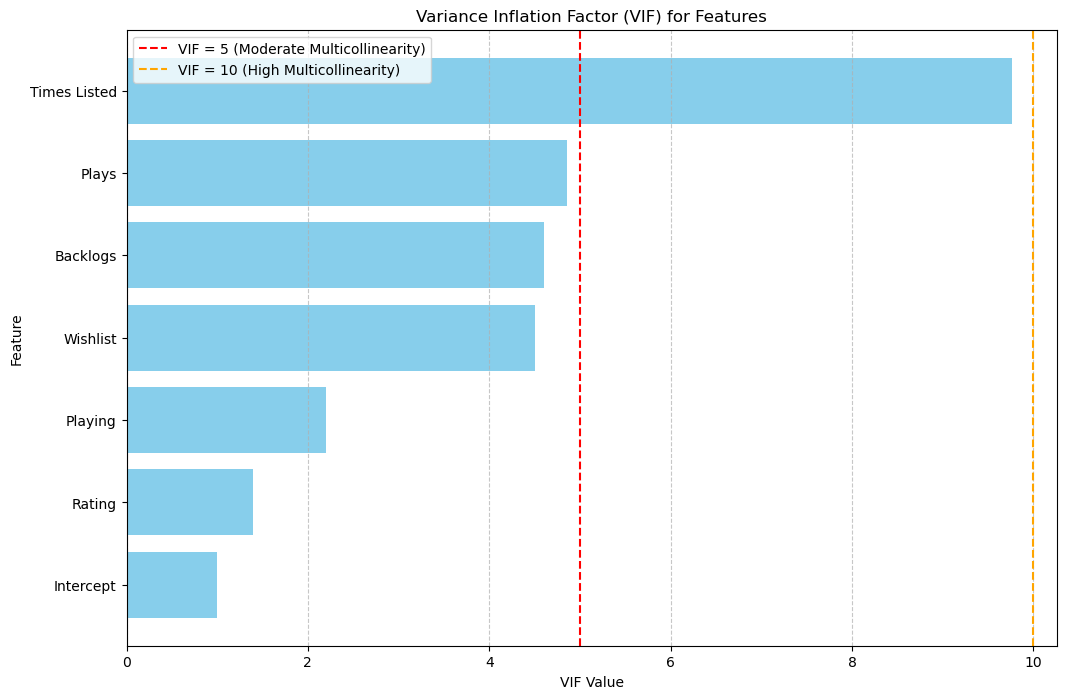

In [65]:
features = ['Rating', 'Times Listed', 'Plays', 'Playing', 'Backlogs', 'Wishlist']
X = df[features].dropna()  # Remove rows with missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_with_constant = add_constant(X_scaled)
vif_data = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'VIF': [variance_inflation_factor(X_with_constant, i) for i in range(X_with_constant.shape[1])]
})

vif_data = vif_data.sort_values(by='VIF', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.axvline(x=5, color='red', linestyle='--', label='VIF = 5 (Moderate Multicollinearity)')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10 (High Multicollinearity)')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.title('Variance Inflation Factor (VIF) for Features')
plt.gca().invert_yaxis()  # Highest VIF at the top
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### 1. Linear Regression (For Continuous Rating Prediction)

In [66]:
# Prepare data
X = df_cleaned[["Times Listed", "Plays", "Playing", "Backlogs", "Wishlist", "Popularity"]].dropna()
y = df_cleaned["Rating"].dropna()
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.20732117551220636


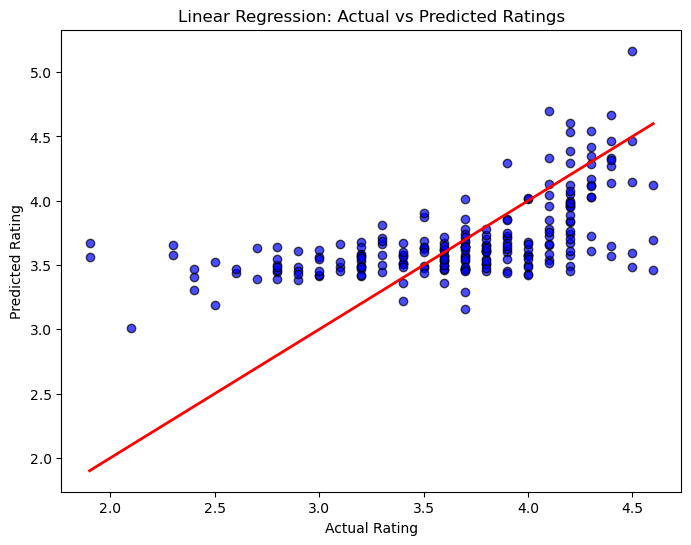

In [67]:
# For Linear Regression, predict ratings
y_pred = model.predict(X_test)
# Plotting the actual vs predicted ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of perfect fit
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression: Actual vs Predicted Ratings')
plt.show()

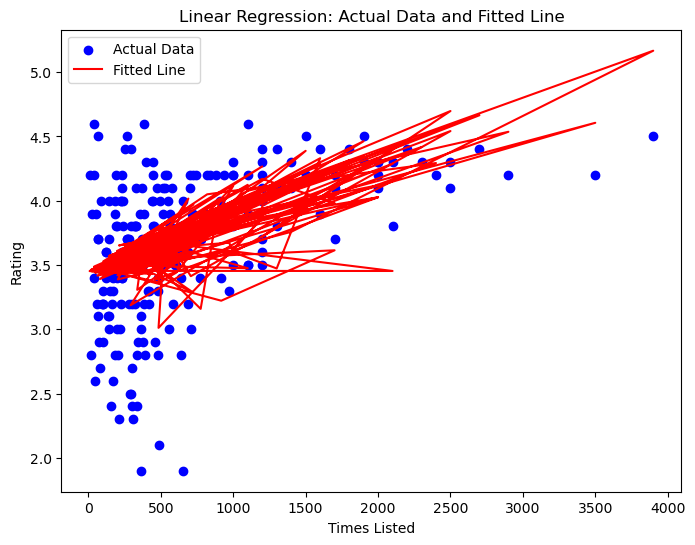

In [68]:
# For Linear Regression, we plot the actual data points and the fitted line
plt.figure(figsize=(8, 6))
# Scatter plot of actual data points
plt.scatter(X_test["Times Listed"], y_test, color='blue', label='Actual Data')
# Plotting the fitted line
plt.plot(X_test["Times Listed"], y_pred, color='red', label='Fitted Line')
# Labels and title
plt.xlabel('Times Listed')
plt.ylabel('Rating')
plt.title('Linear Regression: Actual Data and Fitted Line')
plt.legend()
plt.show()

### 2. Logistic Regression (For Binary Classification: Highly Rated or Not)

In [69]:
df_cleaned["Highly_Rated"] = df_cleaned["Rating"].apply(lambda x: 1 if x >= 4 else 0)  # Create binary target
X = df_cleaned[["Times Listed", "Plays", "Playing", "Backlogs", "Wishlist", "Popularity"]].dropna()
y = df_cleaned["Highly_Rated"].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       146
           1       0.80      0.56      0.66        78

    accuracy                           0.80       224
   macro avg       0.80      0.74      0.76       224
weighted avg       0.80      0.80      0.79       224



<Figure size 600x600 with 0 Axes>

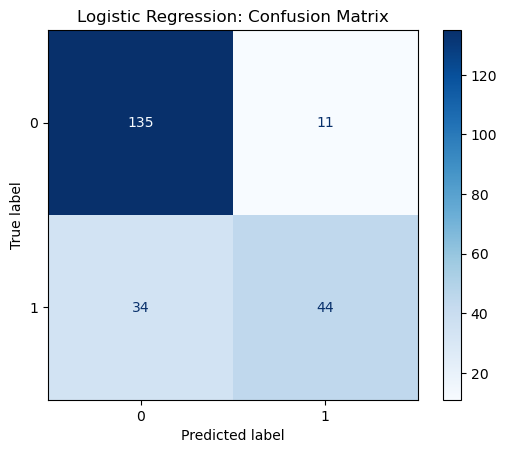

In [70]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()

In [77]:
from sklearn.svm import SVC  # For classification
from sklearn.svm import SVR  # For regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error

# For classification (Highly Rated vs Low Rated)
X = df_cleaned[["Times Listed", "Plays", "Playing", "Backlogs", "Wishlist"]].dropna()
y = df_cleaned["Highly_Rated"].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')  # Using linear kernel for simplicity
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

X = df[["Times Listed", "Plays", "Playing", "Backlogs", "Wishlist"]].dropna()
y = df["Rating"].dropna()

model_reg = SVR(kernel='linear')  # Using linear kernel
model_reg.fit(X_train, y_train)

y_pred_reg = model_reg.predict(X_test)

mse_reg = mean_squared_error(y_test, y_pred_reg)
print(f'Mean Squared Error for Regression: {mse_reg}')

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       146
           1       0.67      0.64      0.65        78

    accuracy                           0.76       224
   macro avg       0.74      0.73      0.74       224
weighted avg       0.76      0.76      0.76       224

Mean Squared Error for Regression: 37.28363725650522


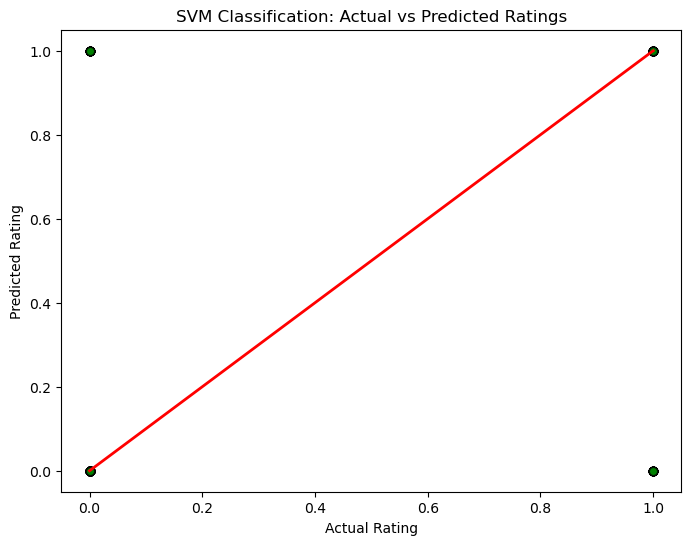

In [78]:
# Predict the binary classification (Highly Rated vs Low Rated)
y_pred = model.predict(X_test)

# Plotting the Actual vs Predicted (SVM classification)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', edgecolors='black', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of perfect fit
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('SVM Classification: Actual vs Predicted Ratings')
plt.show()

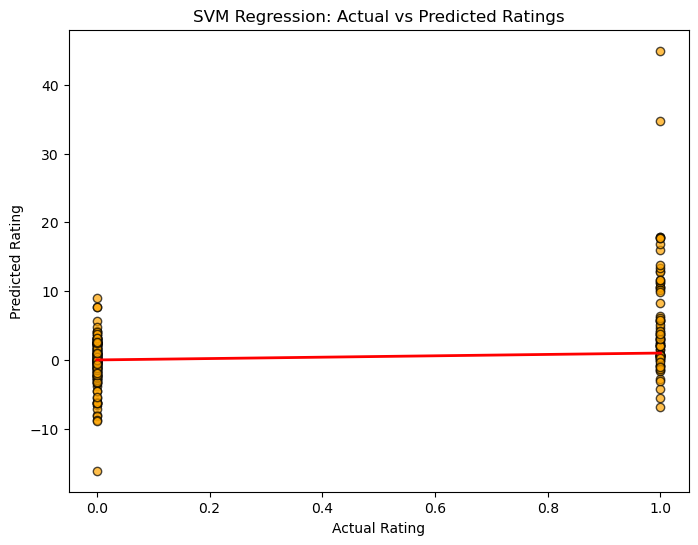

In [79]:
# For SVM Regression, predict ratings
y_pred_reg = model_reg.predict(X_test)

# Plotting the actual vs predicted ratings (for regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, color='orange', edgecolors='black', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line of perfect fit
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('SVM Regression: Actual vs Predicted Ratings')
plt.show()

## Ordinations: Principal Component Analysis

In [71]:
dataframe = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Desktop\\games.csv\\modified_dataset.csv")
dataframe['Release Year'] = pd.to_datetime(dataframe['Release Date'], errors='coerce').dt.year
dataframe = dataframe.drop(columns=['Title','Summary', 'Reviews', 'Release Date'], errors='ignore')
dataframe['Release Year'] = pd.to_numeric(dataframe['Release Year'], errors='coerce')
def safe_convert_to_list(value):
    try:
        if isinstance(value, str):
            return ast.literal_eval(value)
        elif isinstance(value, list):
            return value
    except (ValueError, SyntaxError):
        return []

dataframe['Genres'] = dataframe['Genres'].apply(safe_convert_to_list)
dataframe['Team'] = dataframe['Team'].apply(safe_convert_to_list)

expanded_df = dataframe.explode('Genres')
expanded_df = expanded_df.explode('Team')
expanded_df = pd.get_dummies(expanded_df, columns=['Genres', 'Team'], drop_first=True)
expanded_df = expanded_df.dropna()
expanded_df = expanded_df.apply(pd.to_numeric, errors='coerce')
expanded_df = expanded_df.fillna(0)
expanded_df.head(2)

Rating  Times Listed    Plays  Playing  Backlogs  Wishlist  Release Year  \
0     4.5        3900.0  17000.0   3800.0    4600.0    4800.0        2022.0   
0     4.5        3900.0  17000.0   3800.0    4600.0    4800.0        2022.0   

   Genres_Arcade  Genres_Brawler  Genres_Card & Board Game  ...  Team_miHoYo  \
0          False           False                     False  ...        False   
0          False           False                     False  ...        False   

   Team_niceplay game  Team_ninja_muffin99  Team_nuverse  Team_panstasz  \
0               False                False         False          False   
0               False                False         False          False   

   Team_rose-engine  Team_sprite  Team_tinyBuild  Team_tobyfox  \
0             False        False           False         False   
0             False        False           False         False   

   Team_tri-Crescendo  
0               False  
0               False  

[2 rows x 686 columns]

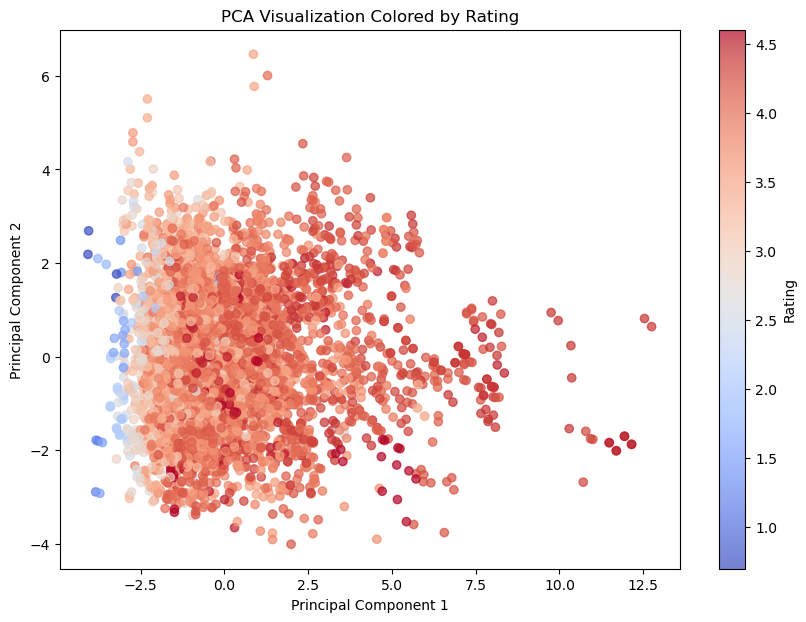

In [62]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expanded_df)
# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['OriginalIndex'] = expanded_df.index

explained_variance = pca.explained_variance_ratio_

if 'Rating' in expanded_df.columns:
    expanded_df['Rating'] = pd.to_numeric(expanded_df['Rating'], errors='coerce')
    pca_df['Rating'] = expanded_df['Rating'].values  # Add ratings back to PCA results

# Plot PCA with color based on Rating
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Rating'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Rating')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization Colored by Rating')
plt.show()

**There seems to be a gap between the PC1 7.5 to about 10**

            PC1       PC2  OriginalIndex  Rating     PC1_Z     PC2_Z  Outlier
0     11.485707 -1.835677              0     4.5  5.430983 -1.266473     True
1     11.941133 -1.698198              0     4.5  5.646330 -1.171624     True
2     11.697718 -2.008084              0     4.5  5.531232 -1.385420     True
3     12.153144 -1.870605              0     4.5  5.746579 -1.290571     True
4     10.785489 -1.593221              1     4.3  5.099887 -1.099198     True
...         ...       ...            ...     ...       ...       ...      ...
2440  12.153144 -1.870605            549     4.5  5.746579 -1.290571     True
2463   6.466496 -0.290959            554     4.3  3.057664 -0.200739     True
4324  -2.532764  4.378169           1002     3.3 -1.197610  3.020593     True
4550  -2.731036  4.589511           1059     3.6 -1.291363  3.166402     True
4551  -2.730492  4.781088           1059     3.6 -1.291105  3.298575     True

[98 rows x 7 columns]


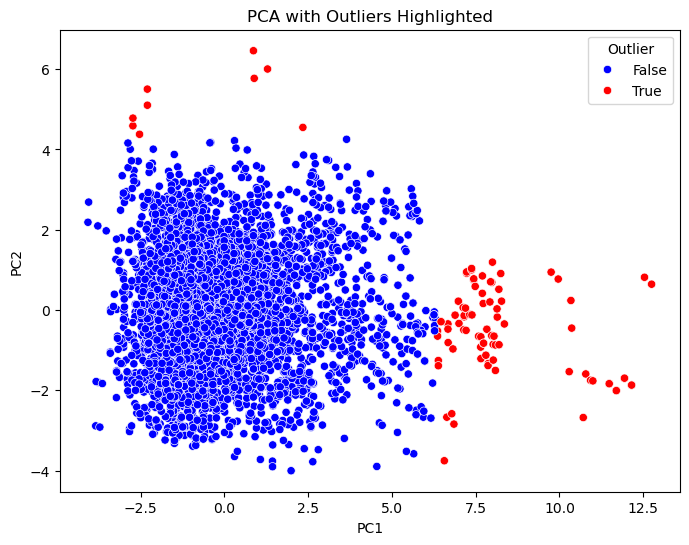

Team  Rating  Times Listed  \
0            [Bandai Namco Entertainment, FromSoftware]     4.5        3900.0   
1                                    [Supergiant Games]     4.3        2900.0   
2       [Nintendo, Nintendo EPD Production Group No. 3]     4.4        4300.0   
3                                        [tobyfox, 8-4]     4.2        3500.0   
4                                         [Team Cherry]     4.4        3000.0   
6                                     [OMOCAT, PLAYISM]     4.2        1600.0   
9                          [PlatinumGames, Square Enix]     4.3        2900.0   
10                                   [Atlus USA, Atlus]     4.4        2700.0   
12    [Sony Interactive Entertainment, SIE Santa Mon...     4.2        2900.0   
14          [FromSoftware, Sony Computer Entertainment]     4.5        3400.0   
15              [Extremely OK Games, Maddy Makes Games]     4.2        2800.0   
16                        [Ryū Ga Gotoku Studios, Sega]     4.4        2700.0   
17               [Take-Two Interactive, Rockstar Games]     4.4        2900.0   
35                           [FromSoftware, Activision]     4.4        2300.0   
48                    [ConcernedApe, Chucklefish Games]     4.1        1700.0   
51                           [WB Games, CD Projekt RED]     4.3        2000.0   
68                             [Nintendo, Nintendo EAD]     4.2        2100.0   
75                            [Nintendo, Nintendo R&D4]     3.5        1500.0   
126                           [Nintendo R&D4, Nintendo]     4.0        1600.0   
326                       [Ryū Ga Gotoku Studios, Sega]     4.4        2700.0   
376                 [Wiz, Namco Networks America, Inc.]     3.4         427.0   
549          [Bandai Namco Entertainment, FromSoftware]     4.5        3900.0   
554                          [WB Games, CD Projekt RED]     4.3        2000.0   
1002                          [Sega, Taito Corporation]     3.3         187.0   
1059  [Atari, Inc., General Computer Corporation (GCC)]     3.6         198.0   

                                            Genres    Plays  Playing  \
0                                 [Adventure, RPG]  17000.0   3800.0   
1                 [Adventure, Brawler, Indie, RPG]  21000.0   3200.0   
2                                 [Adventure, RPG]  30000.0   2500.0   
3     [Adventure, Indie, RPG, Turn Based Strategy]  28000.0    679.0   
4                     [Adventure, Indie, Platform]  21000.0   2400.0   
6     [Adventure, Indie, RPG, Turn Based Strategy]   7200.0   1100.0   
9                                   [Brawler, RPG]  18000.0   1100.0   
10           [Adventure, RPG, Turn Based Strategy]  12000.0   2300.0   
12                       [Adventure, Brawler, RPG]  21000.0   1100.0   
14                                [Adventure, RPG]  17000.0   1100.0   
15                    [Adventure, Indie, Platform]  20000.0   1200.0   
16            [Adventure, Brawler, RPG, Simulator]  15000.0   1800.0   
17                       [Adventure, RPG, Shooter]  19000.0   1700.0   
35                            [Adventure, Brawler]  14000.0    919.0   
48               [Indie, RPG, Simulator, Strategy]  20000.0   2000.0   
51                                [Adventure, RPG]  17000.0   1200.0   
68                           [Adventure, Platform]  18000.0    218.0   
75                           [Adventure, Platform]  18000.0     59.0   
126                                     [Platform]  14000.0    109.0   
326           [Adventure, Brawler, RPG, Simulator]  15000.0   1800.0   
376                                       [Arcade]   5200.0      7.0   
549                               [Adventure, RPG]  17000.0   3800.0   
554                               [Adventure, RPG]  17000.0   1200.0   
1002          [Arcade, Platform, Puzzle, Strategy]   1400.0      3.0   
1059                                      [Arcade]   1600.0      1.0   

      Backlogs  Wishlist  Release Year  
0       4600.0    4800.0      

In [63]:
pca_df['PC1_Z'] = (pca_df['PC1'] - pca_df['PC1'].mean()) / pca_df['PC1'].std()
pca_df['PC2_Z'] = (pca_df['PC2'] - pca_df['PC2'].mean()) / pca_df['PC2'].std()

threshold = 3
pca_df['Outlier'] = (
    (pca_df['PC1_Z'].abs() > threshold) |
    (pca_df['PC2_Z'].abs() > threshold)
)
outlier_points = pca_df[pca_df['Outlier'] == True]
print(outlier_points)

outlier_indices = outlier_points['OriginalIndex']
cleaned_dataset = dataframe.drop(index = outlier_indices)
cleaned_dataset.head()

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Outlier', palette=['blue', 'red'])
plt.title('PCA with Outliers Highlighted')
plt.show()

# Suppose you have these objects:
# 1) your_dataset: the original DataFrame before PCA
# 2) pca_df: the DataFrame with columns ['PC1', 'PC2', 'OriginalIndex', 'Outlier']

# 1. Filter pca_df to get only outlier rows
outliers_pca_df = pca_df[pca_df['Outlier'] == True]
# 2. Extract the original row indices of outliers
outlier_indices = outliers_pca_df['OriginalIndex']
unique_outlier_indices = outlier_indices.drop_duplicates()
# 3. Subset the original DataFrame using these indices
outlier_original_df = dataframe.loc[unique_outlier_indices]
# Now 'outlier_original_df' contains the original data rows that are outliers in PCA space
display(outlier_original_df)

In [64]:
non_outlier_df = dataframe.drop(index=unique_outlier_indices)
outlier_summary = outlier_original_df.describe()
non_outlier_summary = non_outlier_df.describe()
diff_summary = outlier_summary - non_outlier_summary
print(diff_summary)

            Rating  Times Listed         Plays      Playing     Backlogs  \
count -1066.000000  -1066.000000  -1066.000000 -1066.000000 -1066.000000   
mean      0.525863   1822.669734  11306.918423  1240.426031  3225.356040   
std      -0.188870    607.043358   2100.644182   879.288804  1294.661426   
min       2.600000    179.000000   1399.000000     1.000000    40.000000   
25%       0.800000   1463.000000  12400.000000   645.000000  3211.500000   
50%       0.600000   2255.000000  13700.000000  1118.000000  4128.000000   
75%       0.400000   2125.000000  13300.000000  1801.500000  4500.000000   
max      -0.300000   1400.000000  -3000.000000  1100.000000  3100.000000   

          Wishlist  Release Year  
count -1066.000000  -1064.000000  
mean   1579.773052     -1.891570  
std     865.237092      5.898674  
min      29.000000     -6.000000  
25%     924.000000      9.000000  
50%    1599.000000      3.000000  
75%    2552.000000     -1.000000  
max    1100.000000     -1.000000  


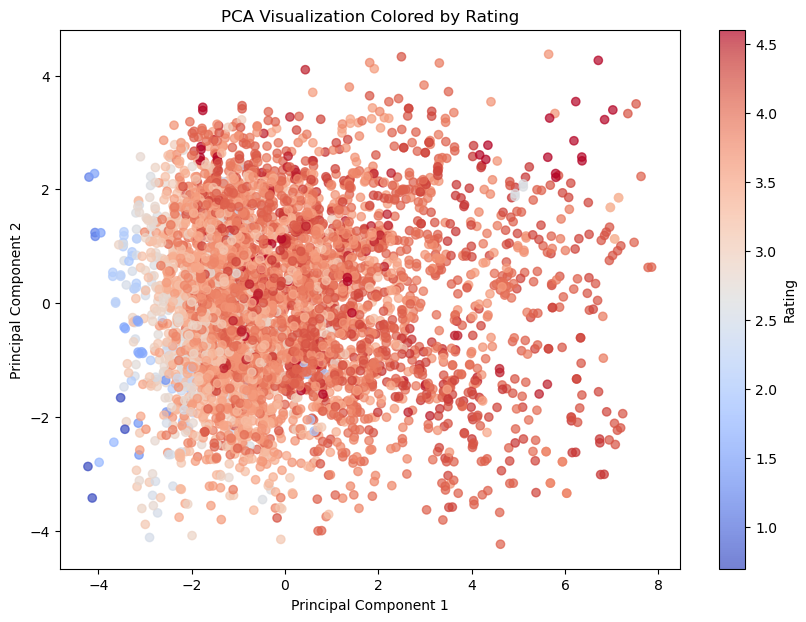

In [65]:
dataframe = cleaned_dataset
dataframe = dataframe.drop(columns=['Title','Summary', 'Reviews', 'Release Date'], errors='ignore')
dataframe['Release Year'] = pd.to_numeric(dataframe['Release Year'], errors='coerce')
def safe_convert_to_list(value):
    try:
        if isinstance(value, str):
            return ast.literal_eval(value)
        elif isinstance(value, list):
            return value
    except (ValueError, SyntaxError):
        return []

dataframe['Genres'] = dataframe['Genres'].apply(safe_convert_to_list)
dataframe['Team'] = dataframe['Team'].apply(safe_convert_to_list)

expanded_df = dataframe.explode('Genres')
expanded_df = expanded_df.explode('Team')
expanded_df = pd.get_dummies(expanded_df, columns=['Genres', 'Team'], drop_first=True)
expanded_df = expanded_df.dropna()
expanded_df = expanded_df.apply(pd.to_numeric, errors='coerce')
expanded_df = expanded_df.fillna(0)
expanded_df.head(2)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(expanded_df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['OriginalIndex'] = expanded_df.index

explained_variance = pca.explained_variance_ratio_

if 'Rating' in expanded_df.columns:
    expanded_df['Rating'] = pd.to_numeric(expanded_df['Rating'], errors='coerce')
    pca_df['Rating'] = expanded_df['Rating'].values  # Add ratings back to PCA results

# Plot PCA with color based on Rating
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Rating'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Rating')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization Colored by Rating')
plt.show()

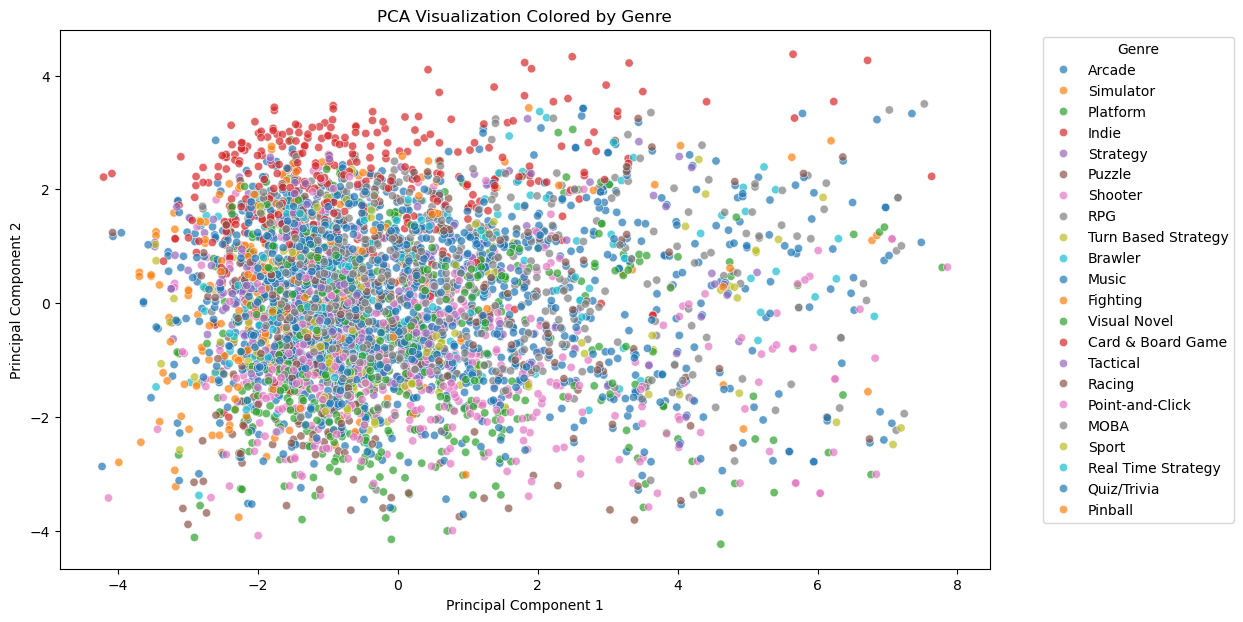

In [66]:
genre_columns = [col for col in expanded_df.columns if col.startswith('Genres_')]
expanded_df['Primary_Genre'] = expanded_df[genre_columns].idxmax(axis=1).str.replace('Genres_', '')
pca_df['Genre'] = expanded_df['Primary_Genre'].values

plt.figure(figsize=(12, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Genre'], palette='tab10', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization Colored by Genre')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

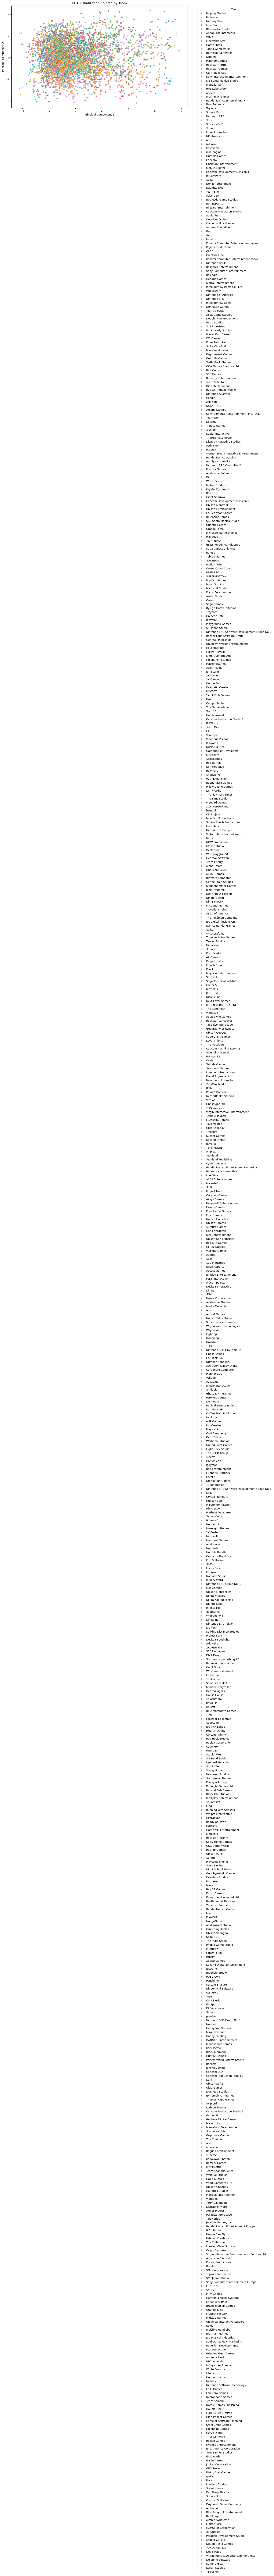

In [67]:
# Extract Primary Team from One-Hot Encoded Columns
team_columns = [col for col in expanded_df.columns if col.startswith('Team_')]
# Identify the primary genre for each row
expanded_df['Primary_Team'] = expanded_df[team_columns].idxmax(axis=1).str.replace('Team_', '')
# Add primary genre to PCA results
pca_df['Team'] = expanded_df['Primary_Team'].values

plt.figure(figsize=(12, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Team'], palette='tab10', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization Colored by Team')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14516\377866193.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], palette='tab10', alpha=0.7)


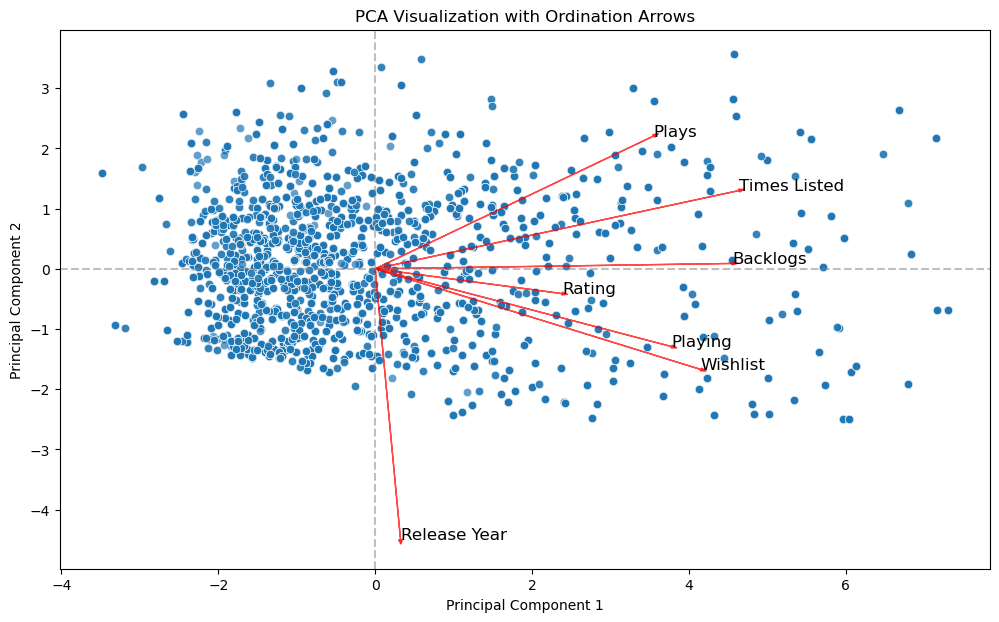

In [68]:
dataframe = expanded_df

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframe.select_dtypes(include=[np.number]))

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(12, 7))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], palette='tab10', alpha=0.7)

for i, col in enumerate(dataframe.select_dtypes(include=[np.number]).columns):
    plt.arrow(0, 0, loadings[i, 0] * 5, loadings[i, 1] * 5, color='red', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0] * 5, loadings[i, 1] * 5, col, color='black', fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Ordination Arrows')
plt.axhline(0, color='grey', linestyle='dashed', alpha=0.5)
plt.axvline(0, color='grey', linestyle='dashed', alpha=0.5)
plt.show()

## PCA With Review Words

### PCA Based on Adjectives

In [69]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import words
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def extract_adjectives(text):
    """
    Tokenize text, perform POS tagging, and return only adjectives.
    """
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    # Keep only words tagged as adjectives (JJ, JJR, JJS)
    adjectives = [word for word, tag in pos_tags if tag in ['JJ', 'JJR', 'JJS']]
    return ' '.join(adjectives)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


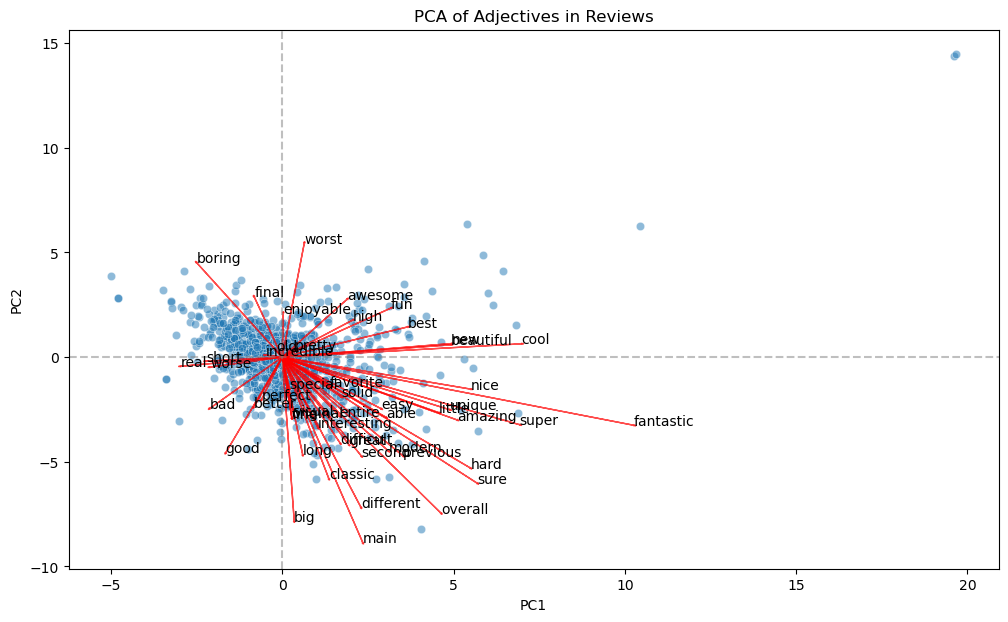

In [73]:
from langdetect import detect, LangDetectException
import nltk
dataframe = pd.read_csv('modified_dataset.csv')
nltk.download('punkt')
def remove_specific_word_tokenized(text, word_to_remove):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [t for t in tokens if t.lower() != word_to_remove]
    return ' '.join(filtered_tokens)

dataframe['Reviews'] = dataframe['Reviews'].fillna('')
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda txt: remove_specific_word_tokenized(txt, 'um'))
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda txt: remove_specific_word_tokenized(txt,'es'))
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda txt: remove_specific_word_tokenized(txt,'eu'))
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda txt: remove_specific_word_tokenized(txt,'na'))

english_vocab = set(words.words())

def remove_non_english_tokens(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Keep only tokens in the English vocabulary (lowercased)
    english_tokens = [t for t in tokens if t.lower() in english_vocab]
    return ' '.join(english_tokens)

# Apply this to each review
if 'Reviews' in dataframe.columns:
    dataframe['Reviews'] = dataframe['Reviews'].fillna('')
    dataframe['Reviews'] = dataframe['Reviews'].apply(remove_non_english_tokens)
else:
    print("Error: 'Reviews' column not found in the dataset.")


# Ensure 'Reviews' column exists
if 'Reviews' in dataframe.columns:
    dataframe['Reviews'] = dataframe['Reviews'].fillna('')

    # Extract only adjectives from reviews
    dataframe['Adjective_Reviews'] = dataframe['Reviews'].apply(extract_adjectives)

    # Convert the filtered adjective text into TF-IDF features
    vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(dataframe['Adjective_Reviews'])

    # Create a DataFrame of TF-IDF scores
    words = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=words)

    # Standardize
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(tfidf_df)

    # Apply PCA
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    # Convert to DataFrame
    pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
    pca_df['OriginalIndex'] = dataframe.index

    # Get PCA loadings
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Plot PCA scatterplot
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], alpha=0.5)

    # Add ordination arrows for top 30 adjectives (by TF-IDF score or loadings)
    top_indices = np.argsort(tfidf_df.mean().values)[::-1][:50]  # top 30 by average TF-IDF
    for i in top_indices:
        word = words[i]
        plt.arrow(0, 0, loadings[i, 0] * 50, loadings[i, 1] * 50, color='red', alpha=0.7, head_width=0.05)
        plt.text(loadings[i, 0] * 50, loadings[i, 1] * 50, word, color='black', fontsize=10)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA of Adjectives in Reviews')
    plt.axhline(0, color='grey', linestyle='dashed', alpha=0.5)
    plt.axvline(0, color='grey', linestyle='dashed', alpha=0.5)
    plt.show()

else:
    print("Error: 'Reviews' column not found in the dataset.")

            PC1        PC2  OriginalIndex      PC1_Z     PC2_Z  Outlier
4      5.309041  -0.072356              4   3.162515 -0.044656     True
95    10.437336   6.273633             95   6.217363  3.871862     True
126    6.450757   4.105340            126   3.842618  2.533669     True
189   19.606838  14.402291            189  11.679497  8.888579     True
248    6.836477   1.516081            248   4.072386  0.935671     True
330    5.705674  -3.552083            330   3.398784 -2.192218     True
337   19.677804  14.473322            337  11.721769  8.932417     True
474    0.910001  -5.094604            474   0.542074 -3.144207     True
481    2.727526  -5.807673            481   1.624746 -3.584288     True
525    4.061621  -8.225219            525   2.419446 -5.076311     True
572    0.972029  -5.831248            572   0.579023 -3.598838     True
716    5.582165  -0.524204            716   3.325211 -0.323520     True
732    3.121371  -5.729898            732   1.859353 -3.536288  

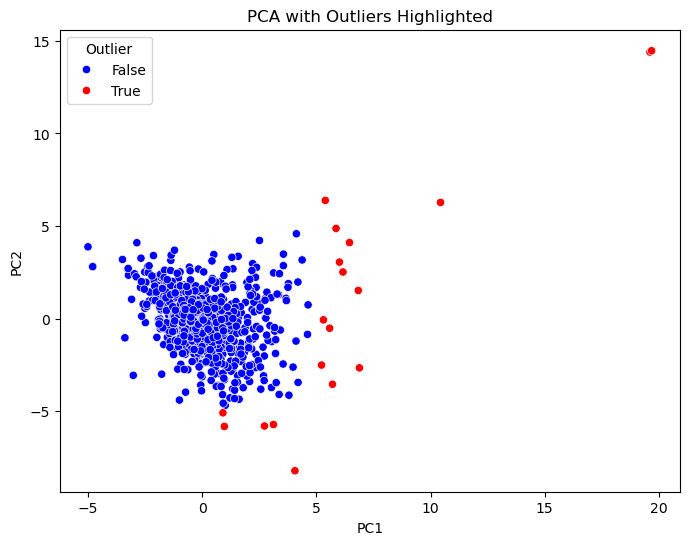

Title  Release Date  \
4                                         Hollow Knight  Feb 24, 2017   
95                             Metroid Prime Remastered  Feb 08, 2023   
126                                 Super Mario Bros. 3  Oct 23, 1988   
189                                    Assassin's Creed  Nov 13, 2007   
248                                               Sable  Sep 23, 2021   
330                          Uncharted 4: A Thief's End  May 10, 2016   
337                                    Assassin's Creed  Nov 13, 2007   
474                                               Braid  Aug 06, 2008   
481                             Serial Experiments Lain  Nov 26, 1998   
525                            Fire Emblem: Thracia 776  Sep 01, 1999   
572   Devil May Cry 3: Dante's Awakening - Special E...  Jan 24, 2006   
716                                       Battlefield 1  Oct 21, 2016   
732                             Metroid Prime 2: Echoes  Nov 15, 2004   
763                 S.T.A.L.K.E.R.: Shadow of Chernobyl  Mar 20, 2007   
899   Professor Layton vs. Phoenix Wright: Ace Attorney  Nov 29, 2012   
902                                     Mega Man Zero 2  May 02, 2003   
921                           Control: Ultimate Edition  Aug 27, 2020   
969                                              Ristar  Feb 16, 1995   
1009                                           Suikoden  Dec 15, 1995   

                                                   Team  Rating  Times Listed  \
4                                       ['Team Cherry']     4.4        3000.0   
95                        ['Nintendo', 'Retro Studios']     4.5         372.0   
126                       ['Nintendo R&D4', 'Nintendo']     4.0        1600.0   
189       ['Ubisoft Montreal', 'Ubisoft Entertainment']     2.9         801.0   
248                           ['Raw Fury', 'Shedworks']     3.5         433.0   
330   ['Naughty Dog', 'Sony Interactive Entertainment']     4.1        1800.0   
337       ['Ubisoft Montreal', 'Ubisoft Entertainment']     2.9         801.0   
474      ['Number None Inc.', 'Microsoft Game Studios']     3.4         380.0   
481                                     ['Pionner LDC']     4.0         173.0   
525       ['Intelligent Systems Co., Ltd.', 'Nintendo']     4.1         329.0   
572            ['Capcom', 'Capcom Production Studio 1']     4.4         852.0   
716      ['EA Digital Illusions CE', 'Electronic Arts']     3.4         513.0   
732                       ['Retro Studios', 'Nintendo']     4.0         606.0   
763                           ['GSC Game World', 'THQ']     3.9         426.0   
899                             ['Level-5', 'Nintendo']     3.6         275.0   
902                          ['Inti Creates', 'Capcom']     3.7         317.0   
921               ['Remedy Entertainment', '505 Games']     4.0         233.0   
969                                            ['Sega']     3.6         233.0   
1009  ['Konami Computer Entertainment Tokyo', 'Konami']     3.6         270.0   

                                                 Genres  \
4                    ['Adventure', 'Indie', 'Platform']   
95                 ['Adventure', 'Platform', 'Shooter']   
126                                        ['Platform']   
189                           ['Adventure', 'Platform']   
248   ['Adventure', 'Indie', 'Platform', 'Puzzle', '...   
330                            ['Adventure', 'Shooter']   
337                           ['Adventure', 'Platform']   
474   ['Adventure', 'Indie', 'Platform', 'Puzzle', '...   
481                                       ['Adventure']   
525                     ['RPG', 'Strategy', 'Tactical']   
572                 ['Adventure', 'Brawler', 'Shooter']   
716                                         ['Shooter']   
732                ['Adventure', 'Platform', 'Shooter']   
763                                  ['RPG', 'Shooter']   
899   ['Adventure', 'Puzzle', 'Strategy', 'Visual No...   
902                ['Adv

In [74]:
pca_df['PC1_Z'] = (pca_df['PC1'] - pca_df['PC1'].mean()) / pca_df['PC1'].std()
pca_df['PC2_Z'] = (pca_df['PC2'] - pca_df['PC2'].mean()) / pca_df['PC2'].std()

threshold = 3
pca_df['Outlier'] = (
    (pca_df['PC1_Z'].abs() > threshold) |
    (pca_df['PC2_Z'].abs() > threshold)
)
outlier_points = pca_df[pca_df['Outlier'] == True]
print(outlier_points)

outlier_indices = outlier_points['OriginalIndex']
cleaned_dataset = dataframe.drop(index = outlier_indices)
print(cleaned_dataset.shape)

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Outlier', palette=['blue', 'red'])
plt.title('PCA with Outliers Highlighted')
plt.show()

# Suppose you have these objects:
# 1) your_dataset: the original DataFrame before PCA
# 2) pca_df: the DataFrame with columns ['PC1', 'PC2', 'OriginalIndex', 'Outlier']

# 1. Filter pca_df to get only outlier rows
outliers_pca_df = pca_df[pca_df['Outlier'] == True]
# 2. Extract the original row indices of outliers
outlier_indices = outliers_pca_df['OriginalIndex']
unique_outlier_indices = outlier_indices.drop_duplicates()
# 3. Subset the original DataFrame using these indices
outlier_original_df = dataframe.loc[unique_outlier_indices]
# Now 'outlier_original_df' contains the original data rows that are outliers in PCA space
display(outlier_original_df)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


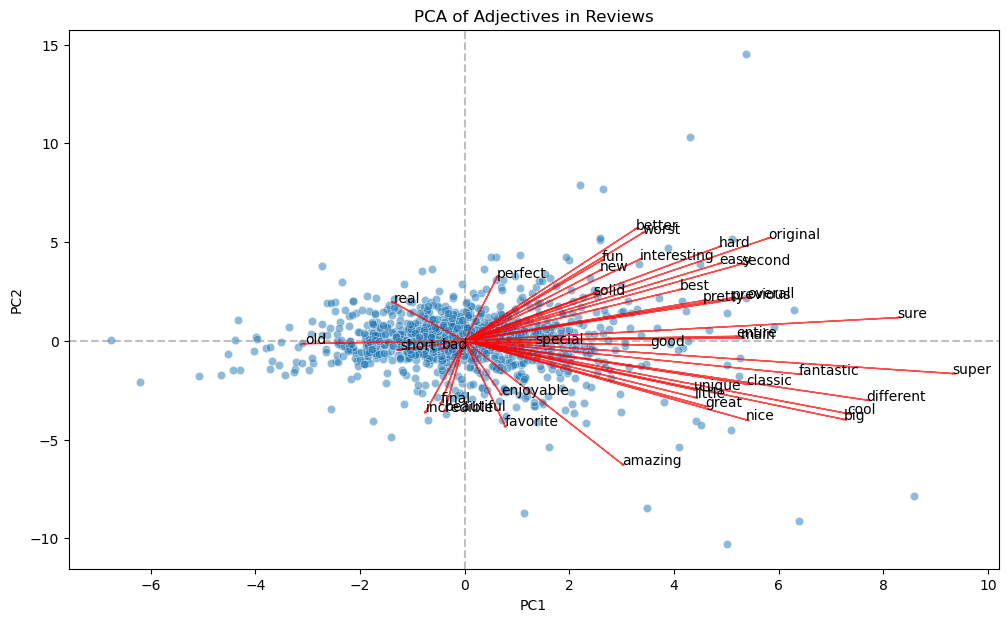

In [75]:
dataframe = cleaned_dataset

import pandas as pd
from langdetect import detect, LangDetectException

import nltk
from nltk.corpus import words
nltk.download('words')
nltk.download('punkt')

def remove_specific_word_tokenized(text, word_to_remove):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [t for t in tokens if t.lower() != word_to_remove]
    return ' '.join(filtered_tokens)

# Example usage
dataframe['Reviews'] = dataframe['Reviews'].fillna('')
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda txt: remove_specific_word_tokenized(txt, 'um'))
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda txt: remove_specific_word_tokenized(txt,'es'))
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda txt: remove_specific_word_tokenized(txt,'eu'))
dataframe['Reviews'] = dataframe['Reviews'].apply(lambda txt: remove_specific_word_tokenized(txt,'na'))

english_vocab = set(words.words())

def remove_non_english_tokens(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Keep only tokens in the English vocabulary (lowercased)
    english_tokens = [t for t in tokens if t.lower() in english_vocab]
    return ' '.join(english_tokens)

# Apply this to each review
if 'Reviews' in dataframe.columns:
    dataframe['Reviews'] = dataframe['Reviews'].fillna('')
    dataframe['Reviews'] = dataframe['Reviews'].apply(remove_non_english_tokens)
else:
    print("Error: 'Reviews' column not found in the dataset.")


# Ensure 'Reviews' column exists
if 'Reviews' in dataframe.columns:
    dataframe['Reviews'] = dataframe['Reviews'].fillna('')

    # Extract only adjectives from reviews
    dataframe['Adjective_Reviews'] = dataframe['Reviews'].apply(extract_adjectives)

    # Convert the filtered adjective text into TF-IDF features
    vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(dataframe['Adjective_Reviews'])

    # Create a DataFrame of TF-IDF scores
    words = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=words)

    # Standardize
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(tfidf_df)

    # Apply PCA
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    # Convert to DataFrame
    pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
    pca_df['OriginalIndex'] = dataframe.index

    # Get PCA loadings
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Plot PCA scatterplot
    plt.figure(figsize=(12, 7))
    sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], alpha=0.5)

    # Add ordination arrows for top 30 adjectives (by TF-IDF score or loadings)
    top_indices = np.argsort(tfidf_df.mean().values)[::-1][:40]  # top 30 by average TF-IDF
    for i in top_indices:
        word = words[i]
        plt.arrow(0, 0, loadings[i, 0] * 50, loadings[i, 1] * 50, color='red', alpha=0.7, head_width=0.05)
        plt.text(loadings[i, 0] * 50, loadings[i, 1] * 50, word, color='black', fontsize=10)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA of Adjectives in Reviews')
    plt.axhline(0, color='grey', linestyle='dashed', alpha=0.5)
    plt.axvline(0, color='grey', linestyle='dashed', alpha=0.5)
    plt.show()

else:
    print("Error: 'Reviews' column not found in the dataset.")

## Cluster Analysis (Using K-Means)

In [76]:
from sklearn.cluster import KMeans
%matplotlib inline
from scipy.spatial import ConvexHull
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples

# Step 1: Determine Optimal K Using Elbow Method
def elbow_method(pca_data, k_range=(1, 11)):
    inertia = []
    K = range(k_range[0], k_range[1])

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(pca_data)
        inertia.append(kmeans.inertia_)
        print(f" K={k}, Inertia={inertia[-1]:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)
    plt.xlabel('Number of Clusters (K)', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.title('Elbow Method for Optimal K', fontsize=16)
    plt.xticks(K)
    plt.grid(True)

    # Optional: Manually set the optimal K based on the plot
    optimal_k = 5
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K = {optimal_k}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return optimal_k

In [77]:
# Step 2: Perform K-Means Clustering & Compute Silhouette Score
def kmeans_clustering(pca_data, optimal_k):
    print(f"\nRunning K-Means clustering with K={optimal_k}...")
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(pca_data)

    # Compute silhouette score
    silhouette_avg = silhouette_score(pca_data, clusters)
    print(f" Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")

    # Plot the silhouette scores per sample
    plot_silhouette(pca_data, clusters)
    
    return kmeans, clusters

In [78]:
# Step 3: Silhouette Analysis & Visualization
def plot_silhouette(pca_data, clusters):
    silhouette_vals = silhouette_samples(pca_data, clusters)
    avg_score = np.mean(silhouette_vals)

    plt.figure(figsize=(10, 6))
    y_lower = 0

    for i in np.unique(clusters):
        cluster_vals = silhouette_vals[clusters == i]
        cluster_vals.sort()
        y_upper = y_lower + len(cluster_vals)

        color = cm.nipy_spectral(float(i) / len(np.unique(clusters)))
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + len(cluster_vals) / 2, str(i), fontsize=12)
        y_lower = y_upper

    plt.axvline(avg_score, color="red", linestyle="--", label=f"Avg: {avg_score:.4f}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.title("Silhouette Analysis for K-Means Clustering")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [79]:
# Step 4: Analyze Clusters (Mean Rating & Dominant Genres)
def analyze_clusters(pca_df, expanded_df, kmeans):
    pca_df = pd.concat([pca_df.reset_index(drop=True), expanded_df.reset_index(drop=True)], axis=1)
    
    cluster_summary = pca_df.groupby('Cluster')['Rating'].mean()
    print("\nCluster Summary (Mean Rating):")
    print(cluster_summary)

    # Mean PCA components for each cluster
    pca_component_summary = pca_df.groupby('Cluster')[['PC1', 'PC2']].mean()
    print("\nCluster Summary (Mean PCA Components):")
    print(pca_component_summary)
    
    # Find and display dominant genres in each cluster
    for cluster in pca_df['Cluster'].unique():
        cluster_data = pca_df[pca_df['Cluster'] == cluster]
        dominant_genres = get_dominant_genres(cluster_data)
        print(f"\nCluster {cluster}: Dominant Genres - {dominant_genres}")

    plot_clusters_with_centroids(pca_df, kmeans)

In [80]:
# Step 5: Identify Dominant Genres in Each Cluster
def get_dominant_genres(cluster_data, top_n=3):
    genre_cols = [col for col in cluster_data.columns if col.startswith('Genres_')]
    genre_counts = cluster_data[genre_cols].sum().sort_values(ascending=False)
    return genre_counts.head(top_n).index.tolist()

In [81]:
# Step 6: Plot Clusters with Centroids
def plot_clusters_with_centroids(pca_df, kmeans):
    plt.figure(figsize=(12, 10))

    sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], 
                    palette='Set2', alpha=0.7, s=100, edgecolor='black')

    for cluster in np.unique(pca_df['Cluster']):
        cluster_points = pca_df[pca_df['Cluster'] == cluster][['PC1', 'PC2']].values
        if len(cluster_points) >= 3:
            hull = ConvexHull(cluster_points)
            for simplex in hull.simplices:
                plt.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], linestyle='--', color='gray', alpha=0.6)

    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=300, edgecolor='black', label="Centroids")

    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.title('Improved K-Means Clusters Visualization', fontsize=16)
    plt.legend(title='Cluster', loc='best', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=1, Inertia=5608.12


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=2, Inertia=3983.16


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=3, Inertia=2985.34


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=4, Inertia=2430.59


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=5, Inertia=2095.55


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=6, Inertia=1795.11


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=7, Inertia=1558.36


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=8, Inertia=1358.53


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=9, Inertia=1175.17


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 K=10, Inertia=1069.86


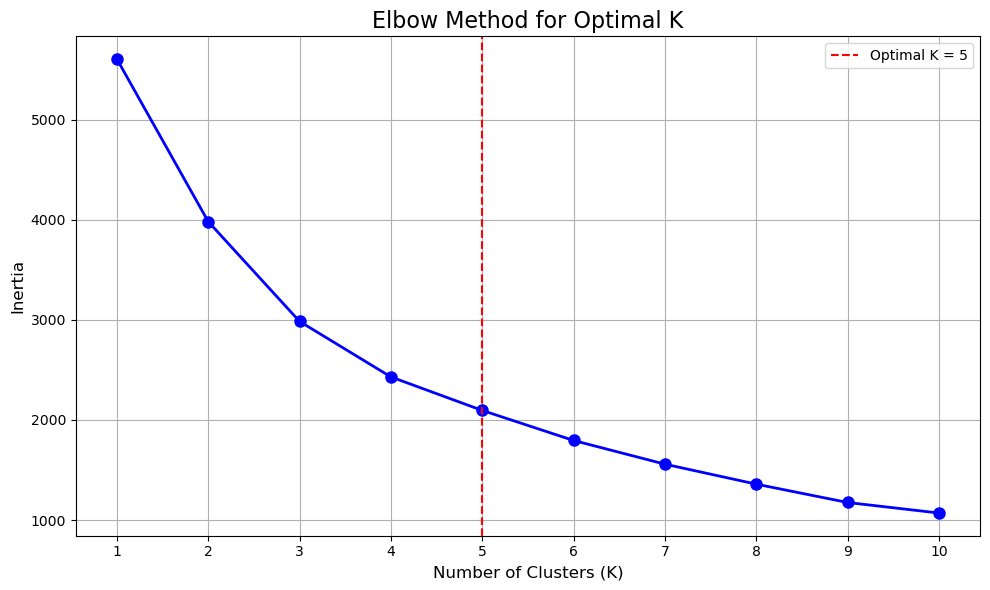


Running K-Means clustering with K=5...


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


 Silhouette Score for K=5: 0.2979


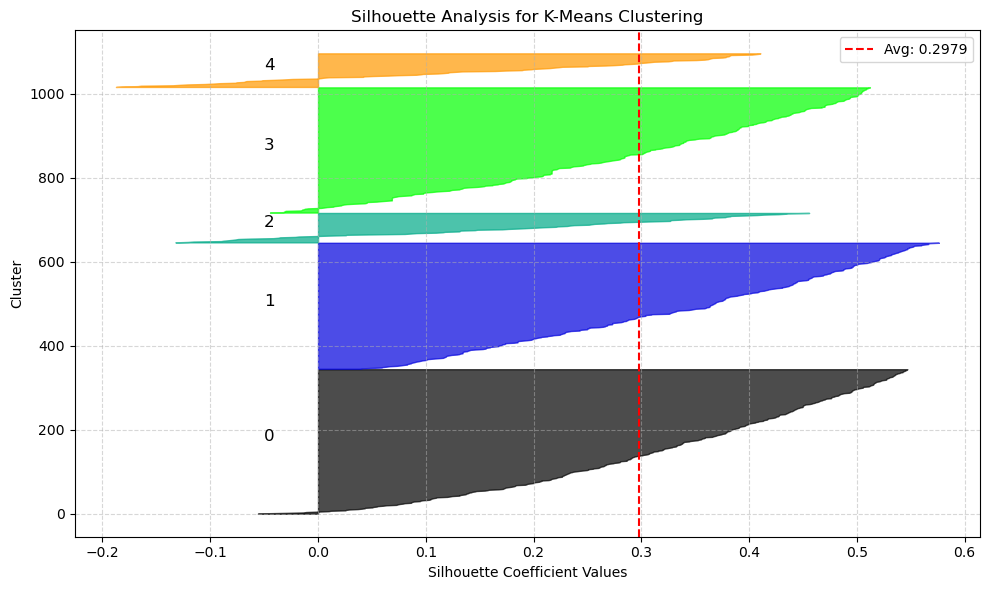


Cluster Summary (Mean Rating):
Cluster
0.0    3.944348
1.0    3.851827
2.0    3.840845
3.0    3.878930
4.0    3.929630
Name: Rating, dtype: float64

Cluster Summary (Mean PCA Components):
              PC1       PC2
Cluster                    
0.0      0.857235 -0.262644
1.0     -0.491508  0.940925
2.0      2.488398  2.843965
3.0     -1.593623 -0.485920
4.0      1.876727 -3.077009

Cluster 1.0: Dominant Genres - ['Genres_RPG', 'Genres_Shooter', 'Genres_Indie']

Cluster 0.0: Dominant Genres - ['Genres_RPG', 'Genres_Shooter', 'Genres_Platform']

Cluster 3.0: Dominant Genres - ['Genres_Shooter', 'Genres_RPG', 'Genres_Platform']

Cluster 4.0: Dominant Genres - ['Genres_RPG', 'Genres_Platform', 'Genres_Shooter']

Cluster 2.0: Dominant Genres - ['Genres_RPG', 'Genres_Shooter', 'Genres_Indie']

Cluster nan: Dominant Genres - ['Genres_Arcade', 'Genres_Brawler', 'Genres_Turn Based Strategy']


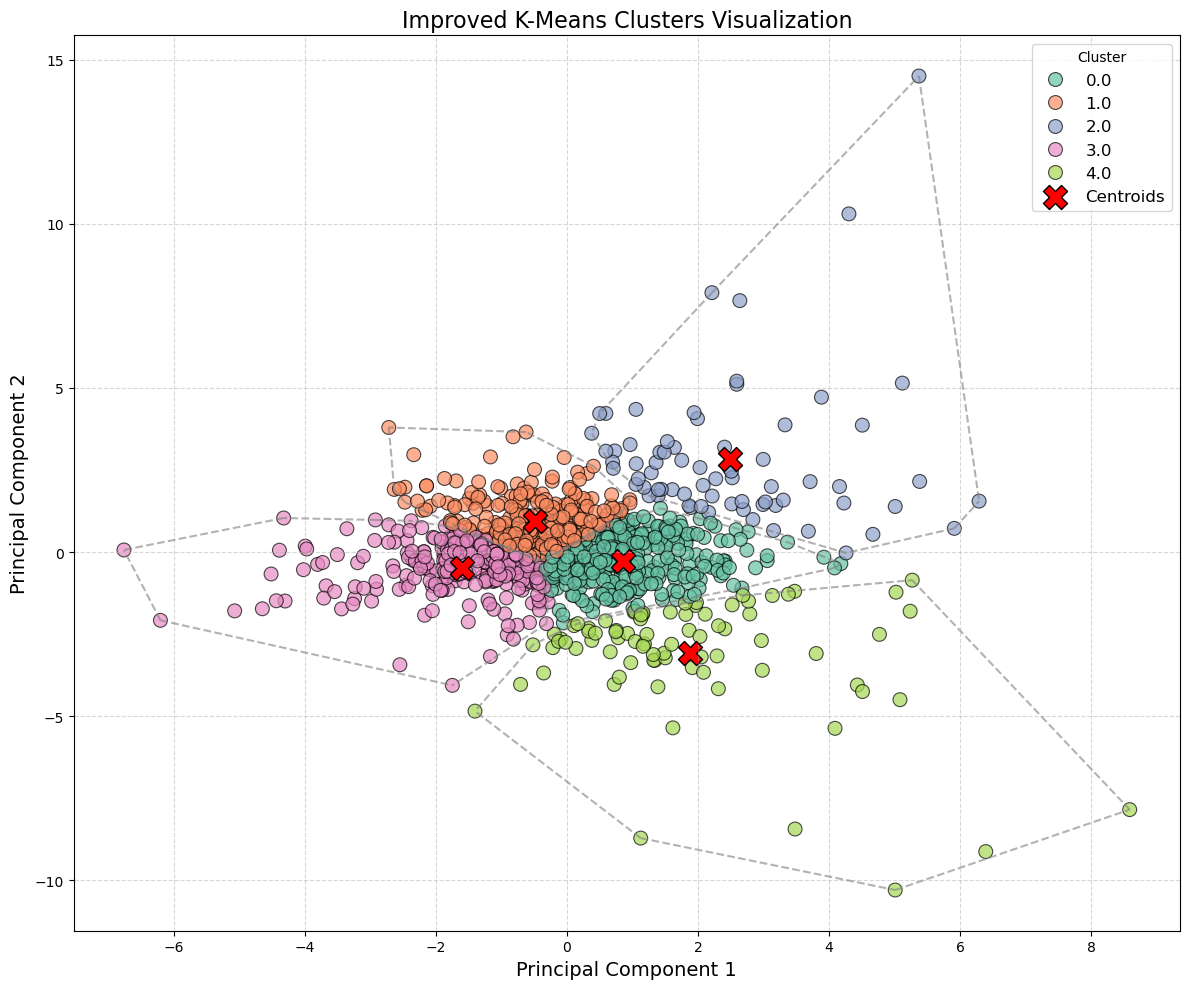

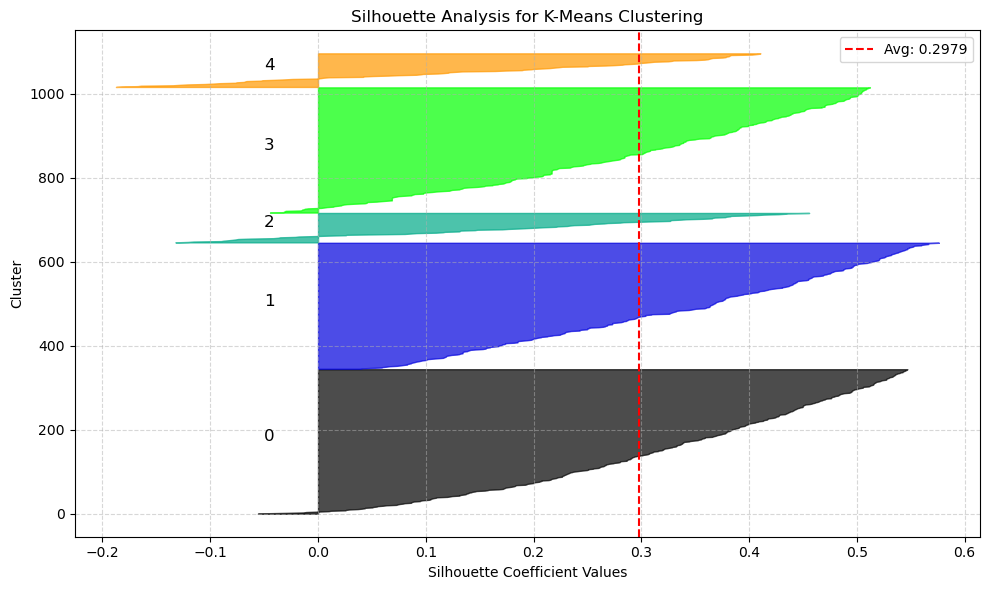

In [82]:
# Final Execution
optimal_k = elbow_method(pca_data)  # Step 1: Find optimal K
kmeans, clusters = kmeans_clustering(pca_data, optimal_k)  # Step 2: Perform KMeans
pca_df['Cluster'] = clusters  # Step 3: Assign clusters
analyze_clusters(pca_df, expanded_df, kmeans)  # Step 4: Analyze clusters
plot_silhouette(pca_data, clusters)  # Step 5: Silhouette visualization